In [1]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from itertools import combinations


In [2]:
data_khanka=pd.read_csv('Steppe_Khanka_and rasters_add.csv', sep=',')

In [3]:
data_khanka.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
0,2.311266e+09,e7a2f416-fea5-41bb-8f17-5217fcaa74d7,NSK0000027,Amaryllidaceae,Allium anisopodium Ledeb.,argunense,SUBSPECIES,Allium anisopodium subsp. argunense Peschkova,RUS,51.467000,...,3.0,89.0,-225.0,8257.5,8257.5,29.78,45.30,-0.28,38.32,648.15997
1,2.417592e+09,3942a8dc-9f01-420d-a829-01675dc01c73,5464942,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,39.710000,...,7.0,197.0,-6.0,27310.5,36760.5,52.20,30.90,-0.41,70.70,1033.93994
2,2.417447e+09,3942a8dc-9f01-420d-a829-01675dc01c73,6562119,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,34.560000,...,7.0,177.0,34.0,36868.5,41340.0,55.33,24.70,-0.47,52.28,1049.94995
3,2.417662e+09,3942a8dc-9f01-420d-a829-01675dc01c73,6562129,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,38.280000,...,6.0,169.0,-15.0,24759.0,32778.0,32.04,32.05,-0.62,61.60,1067.57996
4,1.303784e+09,f9336171-e9a9-4147-b9f6-2d6c133afffd,6562138,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,36.107933,...,7.0,227.0,22.0,34668.0,49846.5,77.90,26.90,-0.13,37.53,852.62000


In [4]:
hanka_only = data_khanka[(data_khanka.decimalLatitude < 45.236845) & (data_khanka.decimalLatitude > 43.797226) & (data_khanka.decimalLongitude> 131.257678) & (data_khanka.decimalLongitude< 131.981854)&(data_khanka.countryCode=='RUS')].copy()


In [5]:
hanka_only.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
632,75336.0,NaN,181566,Amaryllidaceae,Allium anisopodium Ledeb.,NaN,NaN,Allium anisopodium Ledeb.,RUS,45.209740,...,5.0,165.0,-108.0,21336.0,21336.0,42.69,37.55,-0.31,33.60,811.08002
633,75337.0,NaN,181567,Amaryllidaceae,Allium anisopodium Ledeb.,NaN,NaN,Allium anisopodium Ledeb.,RUS,45.220408,...,5.0,165.0,-108.0,21357.0,21357.0,42.69,37.55,-0.31,33.63,811.37000
664,NaN,NaN,NaN,Amaryllidaceae,Allium anisopodium Ledeb.,NaN,NaN,Allium anisopodium Ledeb.,RUS,43.918137,...,5.0,168.0,-86.0,21231.0,21231.0,50.31,34.80,-0.23,40.82,797.57001
669,NaN,NaN,NaN,Amaryllidaceae,Allium anisopodium Ledeb.,NaN,NaN,Allium anisopodium Ledeb.,RUS,44.439553,...,5.0,160.0,-98.0,20674.5,20674.5,48.89,35.60,-0.24,34.27,802.00000
670,NaN,NaN,NaN,Amaryllidaceae,Allium anisopodium Ledeb.,NaN,NaN,Allium anisopodium Ledeb.,RUS,43.918292,...,5.0,168.0,-86.0,21231.0,21231.0,50.31,34.80,-0.23,40.82,797.57001


In [6]:
data_khanka.shape

(28658, 73)

In [7]:
data_prim=pd.read_csv('Steppe_Prim_and rasters_add.csv', sep=',') 

In [8]:
data_prim.shape

(12721, 75)

In [9]:
data_mes=pd.read_csv('Steppe_mes_and rasters_add.csv', sep=',') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18468\2179704881.py:1: DtypeWarning: Columns (5,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data_mes=pd.read_csv('Steppe_mes_and rasters_add.csv', sep=',')


In [10]:
data_mes.shape

(51823, 75)

In [11]:
data_steppe=pd.read_csv('Steppe_steppe_and rasters_add.csv') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18468\391047677.py:1: DtypeWarning: Columns (9,10,14,19,20,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_steppe=pd.read_csv('Steppe_steppe_and rasters_add.csv')


In [12]:
data_steppe.shape

(34725, 77)

### Khanda dataset:

In [13]:
data_khanka.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
0,2.311266e+09,e7a2f416-fea5-41bb-8f17-5217fcaa74d7,NSK0000027,Amaryllidaceae,Allium anisopodium Ledeb.,argunense,SUBSPECIES,Allium anisopodium subsp. argunense Peschkova,RUS,51.467000,...,3.0,89.0,-225.0,8257.5,8257.5,29.78,45.30,-0.28,38.32,648.15997
1,2.417592e+09,3942a8dc-9f01-420d-a829-01675dc01c73,5464942,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,39.710000,...,7.0,197.0,-6.0,27310.5,36760.5,52.20,30.90,-0.41,70.70,1033.93994
2,2.417447e+09,3942a8dc-9f01-420d-a829-01675dc01c73,6562119,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,34.560000,...,7.0,177.0,34.0,36868.5,41340.0,55.33,24.70,-0.47,52.28,1049.94995
3,2.417662e+09,3942a8dc-9f01-420d-a829-01675dc01c73,6562129,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,38.280000,...,6.0,169.0,-15.0,24759.0,32778.0,32.04,32.05,-0.62,61.60,1067.57996
4,1.303784e+09,f9336171-e9a9-4147-b9f6-2d6c133afffd,6562138,Amaryllidaceae,Allium anisopodium Ledeb.,zimmermannianum,VARIETY,Allium anisopodium var. zimmermannianum (Gilg)...,CHN,36.107933,...,7.0,227.0,22.0,34668.0,49846.5,77.90,26.90,-0.13,37.53,852.62000


### Prim dataset

In [14]:
data_prim.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
0,3464835138,4d1b5fed-e12f-48e8-94cb-88cf80115dd1,urn:lsid:biocol.org:col:15550:16:0119:0414,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,altaica,SUBSPECIES,Youngia tenuifolia subsp. altaica Babc. & Steb...,RUS,51.12980,...,5.0,119.0,-93.0,10957.5,16485.0,51.39,32.75,-0.14,42.63,737.26001
1,3464882136,4d1b5fed-e12f-48e8-94cb-88cf80115dd1,urn:lsid:biocol.org:col:15550:16:0495:0336,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,altaica,SUBSPECIES,Youngia tenuifolia subsp. altaica Babc. & Steb...,RUS,51.20270,...,5.0,113.0,-99.0,10440.0,15487.5,53.12,32.70,-0.09,39.21,714.76001
2,2382490292,54f946aa-2ca9-4a51-9ee5-011219e0381e,https://brnu.jacq.org/BRNU581205,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,altaica,SUBSPECIES,Youngia tenuifolia subsp. altaica Babc. & Steb...,RUS,50.40139,...,5.0,118.0,-108.0,10785.0,16243.5,30.70,33.85,-0.48,52.58,725.84998
3,2382490309,54f946aa-2ca9-4a51-9ee5-011219e0381e,https://brnu.jacq.org/BRNU581206,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,altaica,SUBSPECIES,Youngia tenuifolia subsp. altaica Babc. & Steb...,RUS,50.51586,...,5.0,123.0,-106.0,11152.5,16957.5,30.45,34.15,-0.49,53.33,740.52002
4,2570621591,0eacbbfa-45b9-41dc-b7e3-1f0773ce1477,Flora_of_Siberia_2007_Vol_13_map_196_locality_1,Asteraceae,Crepidiastrum tenuifolium (Willd.) Sennikov,tenuifolia,SUBSPECIES,Youngia tenuifolia subsp. tenuifolia,RUS,53.95200,...,5.0,127.0,-114.0,10792.5,15939.0,40.60,35.00,-0.25,47.11,680.77002


### Steppe dataset

In [15]:
data_steppe.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET,Unnamed: 75,Unnamed: 76
0,4045462570,4515e736-fa02-44ee-9808-bf89445104fe,9663470,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,44.21,...,-63.0,23877.0,27348.0,7.74,36.25,-0.89,89.08,979.66998,NaN,NaN
1,4045444803,4515e736-fa02-44ee-9808-bf89445104fe,9402440,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,43.8,...,-82.0,25452.0,25452.0,17.14,37.00,-0.75,76.88,934.01001,NaN,NaN
2,4045243421,4515e736-fa02-44ee-9808-bf89445104fe,6529847,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,40.93,...,-30.0,20989.5,24372.0,16.16,28.25,-0.80,80.31,939.57001,NaN,NaN
3,4044826650,4515e736-fa02-44ee-9808-bf89445104fe,9663462,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,44.3,...,-74.0,29578.5,38758.5,10.48,38.35,-0.86,86.21,1058.62000,NaN,NaN
4,4044826649,4515e736-fa02-44ee-9808-bf89445104fe,9663451,Amaranthaceae,Bassia prostrata (L.) Beck,canescens,VARIETY,Kochia prostrata var. canescens Moq.,CHN,44.43,...,-103.0,29316.0,34020.0,10.58,40.45,-0.86,86.65,1058.44995,NaN,NaN


### Mesophites dataset (mes)

In [16]:
data_mes.head()

,gbifID,datasetKey,occurrenceID,family,species,infraspecificEpithet,taxonRank,scientificName,countryCode,decimalLatitude,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
0,3881342533,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/12648...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,44.569003,...,4.0,139.0,-94.0,13320.0,16201.5,70.14,32.05,0.15,20.44,666.88000
1,3881442492,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/12648...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,44.339847,...,5.0,161.0,-62.0,19278.0,19278.0,67.54,30.80,0.02,21.43,724.78998
2,3881672504,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/12648...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,44.634446,...,4.0,130.0,-111.0,9637.5,14973.0,71.67,32.85,0.21,14.34,643.08002
3,3923591598,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13256...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,42.460158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3915607719,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13665...,Apiaceae,Bupleurum komarovianum Lincz.,NaN,SPECIES,Bupleurum komarovianum O.A.Lincz.,RUS,43.752005,...,4.0,147.0,-84.0,13887.0,16968.0,80.04,31.15,0.23,15.97,666.79999


In [17]:
feature_columns = ['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000',
       'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2',
       'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr_sd', 'et0_v3_yr',
       'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17',
       'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14',
       'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11',
       'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8',
       'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5',
       'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2',
       'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri',
       'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex',
       'current_30arcsec_PETWettestQuarter',
       'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality',
       'current_30arcsec_PETDriestQuarter',
       'current_30arcsec_PETColdestQuarter',
       'current_30arcsec_monthCountByTemp10',
       'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest',
       'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0',
       'current_30arcsec_embergerQ', 'current_30arcsec_continentality',
       'current_30arcsec_climaticMoistureIndex',
       'current_30arcsec_aridityIndexThornthwaite',
       'current_30arcsec_annualPET']

In [18]:
def process_dfs(*dfs):
    allowed_columns = ['species', 'countryCode', 'decimalLatitude', 'decimalLongitude'] + feature_columns
    processed_dfs = []
    for df in dfs:
        df.species = df.species.map(lambda x: ' '.join(map(str.strip, x.split()[:2])))
        processed_dfs.append(df.loc[:, allowed_columns])
    return processed_dfs

In [19]:
data_khanka, data_prim, data_mes, data_steppe, hanka_only = process_dfs(data_khanka, data_prim, data_mes, data_steppe, hanka_only)

In [20]:
data_prim.species.value_counts()

Sabulina verna               6284
Thalictrum foetidum          2340
Braya humilis                1174
Crepidiastrum tenuifolium    1128
Thalictrum petaloideum        742
Clausia aprica                727
Carex macroprophylla          326
Name: species, dtype: int64

In [21]:
data_khanka.species.value_counts()

Carex pediformis                2842
Orostachys spinosa              1995
Polygala sibirica               1676
Carex duriuscula                1493
Nepeta multifida                1288
Helictochloa hookeri            1235
Patrinia rupestris              1021
Pulsatilla turczaninovii         967
Iris humilis                     909
Bupleurum scorzonerifolium       888
Ephedra monosperma               859
Rhaponticum uniflorum            857
Lespedeza juncea                 819
Polygala tenuifolia              812
Artemisia laciniata              763
Allium anisopodium               698
Klasea centauroides              693
Clematis hexapetala              653
Ulmus macrocarpa                 609
Carex korshinskyi                595
Scutellaria baicalensis          592
Stipa baicalensis                488
Leontopodium leontopodioides     434
Filifolium sibiricum             423
Adenophora stenanthina           381
Prunus sibirica                  368
Silene jeniseensis               321
H

In [22]:
data_mes.species.value_counts()

Trifolium lupinaster          3922
Arundinella hirta             3891
Viola mandshurica             3181
Patrinia scabiosifolia        2746
Spodiopogon sibiricus         2477
Artemisia scoparia            2293
Artemisia gmelinii            2248
Flueggea suffruticosa         2151
Hemerocallis minor            2087
Vicia amoena                  2022
Thesium chinense              1798
Kitagawia terebinthacea       1761
Silene repens                 1680
Paeonia lactiflora            1424
Platycodon grandiflorus       1401
Anthoxanthum glabrum          1349
Elymus gmelinii                940
Dictamnus dasycarpus           915
Iris uniflora                  896
Cotoneaster laxiflorus         877
Pulsatilla cernua              877
Vincetoxicum changqinianum     795
Lithospermum erythrorhizon     781
Saussurea pulchella            572
Lilium concolor                571
Veronica linariifolia          565
Potentilla discolor            550
Dontostemon dentatus           518
Viola dissecta      

In [23]:
data_steppe.species.value_counts()

Artemisia frigida            7168
Bassia prostrata             2783
Linum perenne                2654
Eremogone capillaris         1503
Goniolimon speciosum         1480
Delphinium grandiflorum      1310
Potentilla acaulis           1170
Takhtajaniantha austriaca    1167
Achnatherum sibiricum        1143
Stellaria dichotoma           946
Physochlaina physaloides      917
Alyssum lenense               835
Stellera chamaejasme          765
Leymus chinensis              746
Phlojodicarpus sibiricus      740
Caragana pygmaea              722
Stipa krylovii                638
Heteropappus altaicus         563
Allium tenuissimum            563
Oxytropis oxyphylla           490
Androsace incana              476
Oxytropis myriophylla         474
Iris dichotoma                427
Bupleurum bicaule             424
Allium bidentatum             384
Thalictrum squarrosum         332
Astragalus melilotoides       323
Saussurea salicifolia         316
Corispermum declinatum        302
Asparagus daur

LDA data preparation

In [24]:
def prepare_classification_data(*dfs, features=feature_columns):
    X = []
    y = []
    for ind, df in enumerate(dfs):
        _ = df.loc[:, features].apply(pd.to_numeric, errors='coerce').dropna()
        X.append(_)
        y+=[ind] * len(_)
    return pd.concat(X, axis=0).values, np.array(y)
    
    

In [25]:
X, y = prepare_classification_data(data_khanka, data_prim, data_mes, data_steppe)

In [26]:
X.shape

(120922, 56)

In [27]:
pd.value_counts(y)

2    48202
3    32074
0    28070
1    12576
dtype: int64

In [28]:
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from IPython.core.display import HTML, display_html

In [29]:
def analyze_datasets(datasets, features=feature_columns, n_components=2):
    dataset_names = '_'.join(datasets.keys())
    X, y = prepare_classification_data(*datasets.values(), features=features)
    
    if len(datasets) > 2:
        lda = LinearDiscriminantAnalysis(n_components=n_components)
        transformed_data = lda.fit_transform(X, y)
        for col, marker, cl in zip(cycle('rbyck'), cycle('xodv'), range(len(datasets.keys()))):
            plt.scatter(transformed_data[y==cl, 0], transformed_data[y==cl, 1], marker=marker, color=col, label=list(datasets.keys())[cl], alpha=0.3)

        plt.legend()
        plt.show()
    
        display_html(HTML(f'<h3>Explained coef ratio (LDA) for {dataset_names}: {lda.explained_variance_ratio_} </h3>'))
   
    display_html(HTML('<h3>Feature importances of all considered features: </h3>'))
    klf = RandomForestClassifier()
    klf.fit(X, y)
    for name, val in sorted(list(zip(features, klf.feature_importances_)), key=lambda x: x[1], reverse=True):
        print(f"{name} = {val}")
    
    
    display_html(HTML('<h3>Recursive feature elimination procedure, selection the most informative features from</h3>'))
    print(features)
    selector = RFECV(klf, step=1, cv=5, verbose=0, n_jobs=6, scoring="balanced_accuracy")
    selector.fit(X, y)
    
    for feature_name, rank in zip(features, selector.ranking_):
        print(f"{feature_name}: {rank}")
    
    selected_features = np.array(features)[selector.support_]
    
    for feature_name, imp in sorted(zip(selected_features, selector.estimator_.feature_importances_), key=lambda x: x[1], reverse=True): 
        print(f"{feature_name}: {imp}")
    
    display_html(HTML('<h3>Balanced accuracy estimation for the best feature subset: </h3>'))
    klf.fit(X[:, selector.support_], y)
    print(cross_val_score(klf, X[:, selector.support_], y, scoring='balanced_accuracy'))
        
    
    display_html(HTML('<h3>Balanced accuracy estimation for all features in the experiment: </h3>'))
    print(cross_val_score(klf, X, y, cv=5, scoring='balanced_accuracy'))
    
    for name, df in datasets.items():
        display_html(HTML(f'<h3>Descriptive measures for: {name}</h3>'))
        display_html(df.loc[:, features].describe())

    display_html(HTML('<hr>'))



In [30]:
feature_sets={
    'soil': ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7'],
    'terrain': ['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000'],
    'WC21': ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14',
    'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8',
    'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2',
    'wc2.1_30s_bio_1', 'wc2.1_30s_elev'],
    'all_features': feature_columns,
}

datasets = {
    'prim': data_prim,
    'khanka':data_khanka,
    'mes': data_mes,
    'steppe': data_steppe,
    'khanka_only': hanka_only
}


In [31]:
def analyze_all():
    for feature_set_name, features in feature_sets.items():
        
        display_html(HTML(f'<h1>All datasets. Feature set name: {feature_set_name}</h1>'))
        display_html(HTML(f'<h2>datasets: {list(datasets.keys())} </h2>'))
        analyze_datasets(datasets, features=features)
        
        display_html(HTML('<hr>'))
        
        display_html(HTML(f'<h1>Pair analysis.  Feature set name: {feature_set_name}</h1>'))
        all_dataset_combinations = list(combinations(list(datasets.keys()), 2))
        
        for name1, name2 in all_dataset_combinations:
            display_html(HTML(f'<h2>Datasets to compare: {name1}, {name2}</h2>'))
            analyze_datasets({name1: datasets[name1], name2: datasets[name2]}, features=features)
    
        display_html(HTML('<h1>END OF COMPUTATIONS</h1>'))

All datasets. Feature set name: soil

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only']

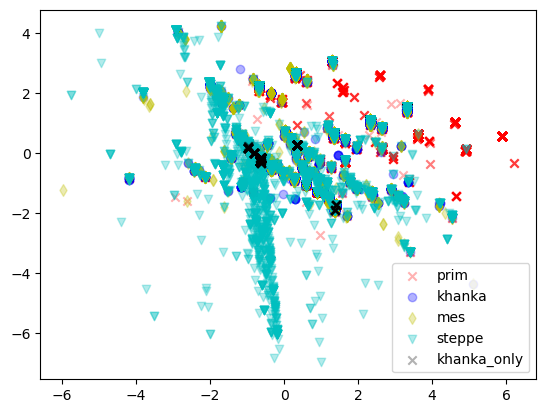

Explained coef ratio (LDA) for prim_khanka_mes_steppe_khanka_only: [0.68444267 0.25542631]

Feature importances of all considered features:

sq3 = 0.22870967005289
sq7 = 0.21692409266992257
sq1 = 0.18543392431161024
sq2 = 0.12176011841131587
sq5 = 0.10389771547494991
sq4 = 0.0877379306928022
sq6 = 0.055536548386509094


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 1
sq7: 1
sq7: 0.22375310784733143
sq3: 0.22242048205866233
sq1: 0.18352334095338424
sq2: 0.11936007824898764
sq5: 0.10588476900971257
sq4: 0.08463858100209323
sq6: 0.06041964087982825


Balanced accuracy estimation for the best feature subset:

[0.27181063 0.29476714 0.38517924 0.3308662  0.29194137]


Balanced accuracy estimation for all features in the experiment:

[0.27196258 0.29472485 0.38476275 0.33088246 0.29219855]


Descriptive measures for: prim

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.430627,2.314912,3.445484,2.147944,2.258313,2.108639,3.378115
std,1.983601,2.014461,1.894847,2.053712,2.027003,2.058306,1.877064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000
75%,3.000000,3.000000,5.000000,2.000000,3.000000,2.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Descriptive measures for: khanka

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.00000,28658.000000
mean,2.240422,2.119757,2.237490,2.000523,1.898772,1.87958,2.236164
std,1.918512,1.939528,2.002159,1.965532,1.969755,1.96660,1.984003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
75%,3.000000,2.000000,3.000000,2.000000,1.000000,1.00000,3.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000


Descriptive measures for: mes

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,1.777936,1.583100,1.953071,1.456226,1.327808,1.319318,1.805723
std,1.446461,1.429845,1.673910,1.450005,1.397062,1.391974,1.530100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Descriptive measures for: steppe

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000
mean,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379
std,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000
max,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000


Descriptive measures for: khanka_only

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,650.000000,650.000000,650.000000,650.000000,650.0,650.0,650.000000
mean,1.575385,1.447692,1.229231,1.221538,1.0,1.0,1.283077
std,0.696465,0.497639,0.420662,0.568970,0.0,0.0,0.450840
min,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
75%,2.000000,2.000000,1.000000,1.000000,1.0,1.0,2.000000
max,3.000000,2.000000,2.000000,3.000000,1.0,1.0,2.000000


Pair analysis. Feature set name: soil

Datasets to compare: prim, khanka

Feature importances of all considered features:

sq3 = 0.3477827759167961
sq7 = 0.268836392327547
sq5 = 0.12762956960512836
sq4 = 0.08120576804420138
sq2 = 0.06385290417264082
sq1 = 0.06106584202333458
sq6 = 0.04962674791035165


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7']
sq1: 2
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 3
sq7: 1
sq3: 0.3948431293096793
sq7: 0.24996493363366773
sq5: 0.1366623101315558
sq4: 0.13569585454691643
sq2: 0.08283377237818068


Balanced accuracy estimation for the best feature subset:

[0.53138146 0.69535011 0.78423213 0.64372734 0.61194689]


Balanced accuracy estimation for all features in the experiment:

[0.53207681 0.72212713 0.80746921 0.63786979 0.59940853]


Descriptive measures for: prim

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.430627,2.314912,3.445484,2.147944,2.258313,2.108639,3.378115
std,1.983601,2.014461,1.894847,2.053712,2.027003,2.058306,1.877064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000
75%,3.000000,3.000000,5.000000,2.000000,3.000000,2.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Descriptive measures for: khanka

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.00000,28658.000000
mean,2.240422,2.119757,2.237490,2.000523,1.898772,1.87958,2.236164
std,1.918512,1.939528,2.002159,1.965532,1.969755,1.96660,1.984003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
75%,3.000000,2.000000,3.000000,2.000000,1.000000,1.00000,3.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000


Datasets to compare: prim, mes

Feature importances of all considered features:

sq7 = 0.4024547029599782
sq3 = 0.24027785773539906
sq5 = 0.12537486213167703
sq1 = 0.06291866395016883
sq6 = 0.06102722830010649
sq2 = 0.05698478124108634
sq4 = 0.05096190368158403


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 1
sq7: 1
sq7: 0.3645051466779649
sq3: 0.2685131630617927
sq5: 0.13355490490375907
sq1: 0.061998886374028166
sq4: 0.0619505392674259
sq2: 0.05979890331848852
sq6: 0.04967845639654078


Balanced accuracy estimation for the best feature subset:

[0.54180729 0.68584507 0.8285957  0.64424422 0.61889229]


Balanced accuracy estimation for all features in the experiment:

[0.54190378 0.68535551 0.82930331 0.64463731 0.61889229]


Descriptive measures for: prim

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.430627,2.314912,3.445484,2.147944,2.258313,2.108639,3.378115
std,1.983601,2.014461,1.894847,2.053712,2.027003,2.058306,1.877064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000
75%,3.000000,3.000000,5.000000,2.000000,3.000000,2.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Descriptive measures for: mes

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,1.777936,1.583100,1.953071,1.456226,1.327808,1.319318,1.805723
std,1.446461,1.429845,1.673910,1.450005,1.397062,1.391974,1.530100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Datasets to compare: prim, steppe

Feature importances of all considered features:

sq7 = 0.3392235764820362
sq3 = 0.28907500995884394
sq5 = 0.09756887690226505
sq1 = 0.09692746322060412
sq4 = 0.07125194502423327
sq2 = 0.05471970465057431
sq6 = 0.0512334237614431


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 2
sq7: 1
sq7: 0.4046264705815534
sq3: 0.21307368406186133
sq5: 0.12078900802782763
sq1: 0.09838810855006085
sq4: 0.09352035905973854
sq2: 0.06960236971895836


Balanced accuracy estimation for the best feature subset:

[0.50512743 0.70997095 0.8255549  0.63396396 0.58327127]


Balanced accuracy estimation for all features in the experiment:

[0.50474794 0.71122219 0.8255549  0.63365654 0.58423453]


Descriptive measures for: prim

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.430627,2.314912,3.445484,2.147944,2.258313,2.108639,3.378115
std,1.983601,2.014461,1.894847,2.053712,2.027003,2.058306,1.877064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000
75%,3.000000,3.000000,5.000000,2.000000,3.000000,2.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Descriptive measures for: steppe

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000
mean,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379
std,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000
max,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000


Datasets to compare: prim, khanka_only

Feature importances of all considered features:

sq3 = 0.2606631920663112
sq7 = 0.23738362544786337
sq2 = 0.18221741376075473
sq1 = 0.137143686234373
sq4 = 0.13042301960970884
sq5 = 0.04119408733290086
sq6 = 0.010974975548088071


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 2
sq7: 1
sq3: 0.28754427694742535
sq7: 0.2174595480508075
sq2: 0.1819270445397374
sq1: 0.15698003297191407
sq4: 0.12030926338079859
sq5: 0.03577983410931712


Balanced accuracy estimation for the best feature subset:

[0.54941061 0.56953919 0.54230769 0.58374456 0.54615385]


Balanced accuracy estimation for all features in the experiment:

[0.54941061 0.56953919 0.54230769 0.58374456 0.54615385]


Descriptive measures for: prim

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.430627,2.314912,3.445484,2.147944,2.258313,2.108639,3.378115
std,1.983601,2.014461,1.894847,2.053712,2.027003,2.058306,1.877064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000
75%,3.000000,3.000000,5.000000,2.000000,3.000000,2.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Descriptive measures for: khanka_only

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,650.000000,650.000000,650.000000,650.000000,650.0,650.0,650.000000
mean,1.575385,1.447692,1.229231,1.221538,1.0,1.0,1.283077
std,0.696465,0.497639,0.420662,0.568970,0.0,0.0,0.450840
min,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
75%,2.000000,2.000000,1.000000,1.000000,1.0,1.0,2.000000
max,3.000000,2.000000,2.000000,3.000000,1.0,1.0,2.000000


Datasets to compare: khanka, mes

Feature importances of all considered features:

sq7 = 0.2676026159014198
sq3 = 0.26758923837654985
sq2 = 0.17536439097764395
sq1 = 0.097240872104027
sq4 = 0.07737707723909171
sq5 = 0.0766600592027087
sq6 = 0.03816574619855899


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 1
sq7: 1
sq3: 0.28490930855032925
sq7: 0.26072700619779837
sq2: 0.1741394840487963
sq1: 0.09402507445206201
sq5: 0.07084997075704161
sq4: 0.06932671121977738
sq6: 0.0460224447741952


Balanced accuracy estimation for the best feature subset:

[0.55404385 0.56855279 0.54581967 0.58598287 0.54175182]


Balanced accuracy estimation for all features in the experiment:

[0.55423481 0.56853428 0.54597366 0.58573037 0.5416071 ]


Descriptive measures for: khanka

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.00000,28658.000000
mean,2.240422,2.119757,2.237490,2.000523,1.898772,1.87958,2.236164
std,1.918512,1.939528,2.002159,1.965532,1.969755,1.96660,1.984003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
75%,3.000000,2.000000,3.000000,2.000000,1.000000,1.00000,3.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000


Descriptive measures for: mes

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,1.777936,1.583100,1.953071,1.456226,1.327808,1.319318,1.805723
std,1.446461,1.429845,1.673910,1.450005,1.397062,1.391974,1.530100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Datasets to compare: khanka, steppe

Feature importances of all considered features:

sq1 = 0.4010288122262945
sq3 = 0.12905183724134278
sq4 = 0.1193909883220546
sq7 = 0.11477203718133452
sq2 = 0.10133571788065737
sq5 = 0.08914133767351878
sq6 = 0.045279269474797455


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 1
sq7: 1
sq1: 0.3974144887898254
sq3: 0.12890312719183394
sq7: 0.11724398913745937
sq4: 0.11714696805710681
sq2: 0.10835352609314289
sq5: 0.09328719883821636
sq6: 0.03765070189241535


Balanced accuracy estimation for the best feature subset:

[0.55685913 0.55987895 0.62051106 0.55481257 0.48858156]


Balanced accuracy estimation for all features in the experiment:

[0.55681761 0.55980695 0.61916109 0.55463134 0.48824357]


Descriptive measures for: khanka

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.00000,28658.000000
mean,2.240422,2.119757,2.237490,2.000523,1.898772,1.87958,2.236164
std,1.918512,1.939528,2.002159,1.965532,1.969755,1.96660,1.984003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
75%,3.000000,2.000000,3.000000,2.000000,1.000000,1.00000,3.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000


Descriptive measures for: steppe

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000
mean,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379
std,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000
max,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000


Datasets to compare: khanka, khanka_only

Feature importances of all considered features:

sq2 = 0.2572574163748493
sq4 = 0.2511081630004794
sq1 = 0.15704496771064197
sq7 = 0.14587891147250498
sq3 = 0.13669214195445722
sq5 = 0.041534965386969554
sq6 = 0.010483434100097555


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7']
sq1: 4
sq2: 1
sq3: 2
sq4: 3
sq5: 6
sq6: 7
sq7: 5
sq2: 1.0


Balanced accuracy estimation for the best feature subset:

[0.5 0.5 0.5 0.5 0.5]


Balanced accuracy estimation for all features in the experiment:

[0.5 0.5 0.5 0.5 0.5]


Descriptive measures for: khanka

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.00000,28658.000000
mean,2.240422,2.119757,2.237490,2.000523,1.898772,1.87958,2.236164
std,1.918512,1.939528,2.002159,1.965532,1.969755,1.96660,1.984003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
75%,3.000000,2.000000,3.000000,2.000000,1.000000,1.00000,3.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000


Descriptive measures for: khanka_only

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,650.000000,650.000000,650.000000,650.000000,650.0,650.0,650.000000
mean,1.575385,1.447692,1.229231,1.221538,1.0,1.0,1.283077
std,0.696465,0.497639,0.420662,0.568970,0.0,0.0,0.450840
min,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
75%,2.000000,2.000000,1.000000,1.000000,1.0,1.0,2.000000
max,3.000000,2.000000,2.000000,3.000000,1.0,1.0,2.000000


Datasets to compare: mes, steppe

Feature importances of all considered features:

sq1 = 0.2521790377049013
sq3 = 0.20231553267960178
sq7 = 0.1828081693680323
sq2 = 0.13187261630032568
sq4 = 0.0856310947614727
sq5 = 0.08563040733856177
sq6 = 0.059563141847104525


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 1
sq7: 1
sq1: 0.2558326014112043
sq3: 0.20850555246684116
sq7: 0.18227411185546682
sq2: 0.13687437421073653
sq5: 0.08961600592772058
sq4: 0.07793000326693024
sq6: 0.04896735086110036


Balanced accuracy estimation for the best feature subset:

[0.65351298 0.53867893 0.64371603 0.67847109 0.63607844]


Balanced accuracy estimation for all features in the experiment:

[0.6537052  0.53865445 0.64359579 0.67952577 0.63624693]


Descriptive measures for: mes

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,1.777936,1.583100,1.953071,1.456226,1.327808,1.319318,1.805723
std,1.446461,1.429845,1.673910,1.450005,1.397062,1.391974,1.530100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Descriptive measures for: steppe

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000
mean,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379
std,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000
max,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000


Datasets to compare: mes, khanka_only

Feature importances of all considered features:

sq4 = 0.3452145793645102
sq1 = 0.23102995208061777
sq3 = 0.14135505299870074
sq2 = 0.13796006407622674
sq7 = 0.11013511307471087
sq5 = 0.023834992774296706
sq6 = 0.01047024563093705


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7']
sq1: 1
sq2: 4
sq3: 3
sq4: 2
sq5: 6
sq6: 7
sq7: 5
sq1: 1.0


Balanced accuracy estimation for the best feature subset:

[0.5 0.5 0.5 0.5 0.5]


Balanced accuracy estimation for all features in the experiment:

[0.5 0.5 0.5 0.5 0.5]


Descriptive measures for: mes

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,1.777936,1.583100,1.953071,1.456226,1.327808,1.319318,1.805723
std,1.446461,1.429845,1.673910,1.450005,1.397062,1.391974,1.530100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Descriptive measures for: khanka_only

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,650.000000,650.000000,650.000000,650.000000,650.0,650.0,650.000000
mean,1.575385,1.447692,1.229231,1.221538,1.0,1.0,1.283077
std,0.696465,0.497639,0.420662,0.568970,0.0,0.0,0.450840
min,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
75%,2.000000,2.000000,1.000000,1.000000,1.0,1.0,2.000000
max,3.000000,2.000000,2.000000,3.000000,1.0,1.0,2.000000


Datasets to compare: steppe, khanka_only

Feature importances of all considered features:

sq1 = 0.30171255515092743
sq4 = 0.29300948137686184
sq2 = 0.16099732587894788
sq3 = 0.10974874041370229
sq7 = 0.07802556418407913
sq5 = 0.046324619454658336
sq6 = 0.010181713540822968


Recursive feature elimination procedure, selection the most informative features from

['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7']
sq1: 1
sq2: 1
sq3: 1
sq4: 1
sq5: 1
sq6: 2
sq7: 1
sq1: 0.3132186081809649
sq4: 0.2713949719859636
sq2: 0.16650693388053908
sq3: 0.11473503658794039
sq7: 0.08337397489262673
sq5: 0.05077047447196528


Balanced accuracy estimation for the best feature subset:

[0.54230769 0.52307692 0.53055325 0.55384615 0.52307692]


Balanced accuracy estimation for all features in the experiment:

[0.54230769 0.52307692 0.53055325 0.55384615 0.52307692]


Descriptive measures for: steppe

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000
mean,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379
std,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000
max,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000


Descriptive measures for: khanka_only

,sq1,sq2,sq3,sq4,sq5,sq6,sq7
count,650.000000,650.000000,650.000000,650.000000,650.0,650.0,650.000000
mean,1.575385,1.447692,1.229231,1.221538,1.0,1.0,1.283077
std,0.696465,0.497639,0.420662,0.568970,0.0,0.0,0.450840
min,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
75%,2.000000,2.000000,1.000000,1.000000,1.0,1.0,2.000000
max,3.000000,2.000000,2.000000,3.000000,1.0,1.0,2.000000


END OF COMPUTATIONS

All datasets. Feature set name: terrain

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only']

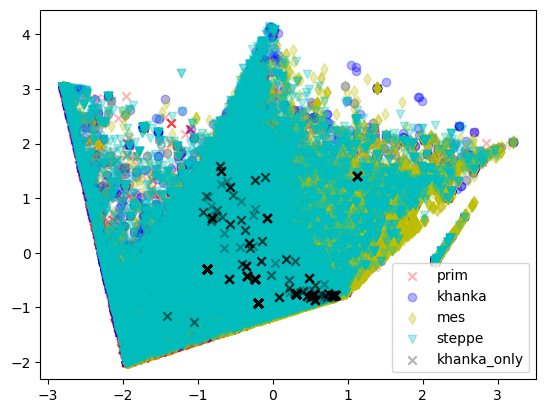

Explained coef ratio (LDA) for prim_khanka_mes_steppe_khanka_only: [0.8233294 0.15213854]

Feature importances of all considered features:

GRS_2000 = 0.18902804546624435
URB_2000 = 0.17537522966279975
FOR_2000 = 0.16465809795484
NVG_2000 = 0.13346159859138593
CULTRF_2000 = 0.11331202828742612
CULT_2000 = 0.11230681603778704
CULTIR_2000 = 0.08206481905184432
WAT_2000 = 0.029793364947672468


Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
WAT_2000: 3
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 2
CULT_2000: 1
GRS_2000: 0.21441828142316965
URB_2000: 0.19461844352092197
FOR_2000: 0.17904698253865672
NVG_2000: 0.14061282333095945
CULT_2000: 0.13658630120370746
CULTRF_2000: 0.13471716798258476


Balanced accuracy estimation for the best feature subset:

[0.4238663  0.45555396 0.47516567 0.49195569 0.46826622]


Balanced accuracy estimation for all features in the experiment:

[0.39799914 0.45709947 0.50558408 0.48591707 0.46880393]


Descriptive measures for: prim

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.156044,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033
std,9.868442,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000
50%,0.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750
75%,0.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510
max,100.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250


Descriptive measures for: khanka

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000
mean,3.677077,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995
std,12.896483,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013
min,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,0.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840
50%,0.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240
75%,0.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500
max,100.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380


Descriptive measures for: mes

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,51823.00000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,2.69050,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069
std,10.42965,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783
min,0.00000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,0.00000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870
50%,0.00000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840
75%,0.00000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750
max,100.00000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000
count,34725.000000,34725.000000
mean,8.250131,16.554474
std,17.445077,21.934457
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.761650,5.581600
75%,8.007510,26.700920
max,100.000000,97.152360


Descriptive measures for: khanka_only

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.447062,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515
std,2.711455,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955
min,0.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000
25%,0.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000
50%,0.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210
75%,0.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370
max,16.976400,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100


Pair analysis. Feature set name: terrain

Datasets to compare: prim, khanka

Feature importances of all considered features:

GRS_2000 = 0.20065262537738296
FOR_2000 = 0.18014975158239502
URB_2000 = 0.17401158471152647
NVG_2000 = 0.11745566343718798
CULT_2000 = 0.11677976720549692
CULTRF_2000 = 0.10096297740203541
CULTIR_2000 = 0.07955527157858522
WAT_2000 = 0.03043235870539007


Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
WAT_2000: 2
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.20851885330764675
FOR_2000: 0.19159408808517062
URB_2000: 0.17987303038321031
NVG_2000: 0.11702249552615
CULT_2000: 0.11619333991171855
CULTRF_2000: 0.10345926127061576
CULTIR_2000: 0.08333893151548799


Balanced accuracy estimation for the best feature subset:

[0.57904448 0.80079533 0.87896305 0.68435507 0.61559292]


Balanced accuracy estimation for all features in the experiment:

[0.57131713 0.79915675 0.88541584 0.6818453  0.61537625]


Descriptive measures for: prim

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.156044,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033
std,9.868442,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000
50%,0.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750
75%,0.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510
max,100.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250


Descriptive measures for: khanka

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000
mean,3.677077,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995
std,12.896483,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013
min,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,0.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840
50%,0.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240
75%,0.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500
max,100.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380


Datasets to compare: prim, mes

Feature importances of all considered features:

GRS_2000 = 0.2325021316609035
URB_2000 = 0.17906001363823446
FOR_2000 = 0.15370614433808324
CULT_2000 = 0.109352761410802
NVG_2000 = 0.10812289740617181
CULTRF_2000 = 0.10488407674293487
CULTIR_2000 = 0.08844702838855663
WAT_2000 = 0.023924946414313523


Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
WAT_2000: 2
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.2429178157519321
URB_2000: 0.1826734940315794
FOR_2000: 0.1591565672049163
CULT_2000: 0.11174760761370725
CULTRF_2000: 0.10809813619188621
NVG_2000: 0.10740968276300014
CULTIR_2000: 0.08799669644297853


Balanced accuracy estimation for the best feature subset:

[0.60734652 0.82224689 0.93234369 0.7007493  0.6571196 ]


Balanced accuracy estimation for all features in the experiment:

[0.60989706 0.82293299 0.93556332 0.69745635 0.65506484]


Descriptive measures for: prim

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.156044,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033
std,9.868442,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000
50%,0.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750
75%,0.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510
max,100.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250


Descriptive measures for: mes

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,51823.00000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,2.69050,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069
std,10.42965,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783
min,0.00000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,0.00000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870
50%,0.00000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840
75%,0.00000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750
max,100.00000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000


Datasets to compare: prim, steppe

Feature importances of all considered features:

GRS_2000 = 0.18912394552195963
URB_2000 = 0.1817133955514572
FOR_2000 = 0.17708070494945047
NVG_2000 = 0.13076321956292486
CULT_2000 = 0.12117990724030242
CULTRF_2000 = 0.09728903255197538
CULTIR_2000 = 0.07298324854592819
WAT_2000 = 0.0298665460760019


Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
WAT_2000: 3
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 2
CULT_2000: 1
GRS_2000: 0.21408623029280727
URB_2000: 0.19910392044689154
FOR_2000: 0.19542511349879127
CULT_2000: 0.1484105043900292
NVG_2000: 0.133608441409943
CULTRF_2000: 0.10936578996153763


Balanced accuracy estimation for the best feature subset:

[0.54362262 0.79613023 0.89536731 0.67119187 0.61769875]


Balanced accuracy estimation for all features in the experiment:

[0.54024401 0.79367566 0.89334027 0.66855579 0.61175593]


Descriptive measures for: prim

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.156044,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033
std,9.868442,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000
50%,0.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750
75%,0.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510
max,100.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000
count,34725.000000,34725.000000
mean,8.250131,16.554474
std,17.445077,21.934457
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.761650,5.581600
75%,8.007510,26.700920
max,100.000000,97.152360


Datasets to compare: prim, khanka_only

Feature importances of all considered features:

URB_2000 = 0.23954744679931886
GRS_2000 = 0.18235992635831738
FOR_2000 = 0.16271131552526844
CULT_2000 = 0.1525029800411508
CULTRF_2000 = 0.15097150674138646
CULTIR_2000 = 0.07891149037037362
NVG_2000 = 0.022156026984861993
WAT_2000 = 0.010839307179322506


Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
WAT_2000: 2
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
URB_2000: 0.24222092243168072
GRS_2000: 0.1707713000481476
CULTRF_2000: 0.16495404052547036
FOR_2000: 0.16102741558402175
CULT_2000: 0.1538357787432932
CULTIR_2000: 0.08550105825213677
NVG_2000: 0.021689484415249653


Balanced accuracy estimation for the best feature subset:

[0.99211123 0.94230769 0.98441884 0.94034228 0.94834301]


Balanced accuracy estimation for all features in the experiment:

[0.99211123 0.94230769 0.98846154 0.94418844 0.94932571]


Descriptive measures for: prim

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000
mean,2.156044,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033
std,9.868442,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000
50%,0.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750
75%,0.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510
max,100.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250


Descriptive measures for: khanka_only

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.447062,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515
std,2.711455,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955
min,0.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000
25%,0.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000
50%,0.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210
75%,0.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370
max,16.976400,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100


Datasets to compare: khanka, mes

Feature importances of all considered features:

GRS_2000 = 0.19671843009297812
URB_2000 = 0.18401762556569734
FOR_2000 = 0.1510248847139832
NVG_2000 = 0.1455733224827787
CULT_2000 = 0.10699768347098004
CULTRF_2000 = 0.10675847881089585
CULTIR_2000 = 0.07510955961852628
WAT_2000 = 0.03380001524416054


Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
WAT_2000: 2
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.20768669258070677
URB_2000: 0.18996066980215176
FOR_2000: 0.1566306219968846
NVG_2000: 0.14557000280047108
CULTRF_2000: 0.11088801207474143
CULT_2000: 0.11008141472661068
CULTIR_2000: 0.07918258601843366


Balanced accuracy estimation for the best feature subset:

[0.65169632 0.68579404 0.60344365 0.71014679 0.65637343]


Balanced accuracy estimation for all features in the experiment:

[0.65701007 0.68418687 0.60419313 0.71192352 0.65900622]


Descriptive measures for: khanka

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000
mean,3.677077,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995
std,12.896483,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013
min,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,0.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840
50%,0.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240
75%,0.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500
max,100.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380


Descriptive measures for: mes

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,51823.00000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,2.69050,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069
std,10.42965,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783
min,0.00000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,0.00000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870
50%,0.00000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840
75%,0.00000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750
max,100.00000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000


Datasets to compare: khanka, steppe

Feature importances of all considered features:

FOR_2000 = 0.17953973699479675
GRS_2000 = 0.1794982445022916
URB_2000 = 0.17095340410685642
CULT_2000 = 0.12292513578665092
CULTRF_2000 = 0.11850930782100731
NVG_2000 = 0.11816674536120154
CULTIR_2000 = 0.07496357594265489
WAT_2000 = 0.03544384948454065


Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
WAT_2000: 2
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
GRS_2000: 0.18833150653015918
FOR_2000: 0.18675829731218743
URB_2000: 0.1784565353420356
CULT_2000: 0.12720114587486747
CULTRF_2000: 0.12148643283665693
NVG_2000: 0.11816859047080797
CULTIR_2000: 0.07959749163328546


Balanced accuracy estimation for the best feature subset:

[0.61150837 0.62345029 0.58398657 0.58717492 0.54860064]


Balanced accuracy estimation for all features in the experiment:

[0.61017323 0.62622612 0.58212211 0.58920269 0.54933569]


Descriptive measures for: khanka

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000
mean,3.677077,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995
std,12.896483,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013
min,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,0.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840
50%,0.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240
75%,0.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500
max,100.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000
count,34725.000000,34725.000000
mean,8.250131,16.554474
std,17.445077,21.934457
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.761650,5.581600
75%,8.007510,26.700920
max,100.000000,97.152360


Datasets to compare: khanka, khanka_only

Feature importances of all considered features:

URB_2000 = 0.23449957459726295
GRS_2000 = 0.17945312897305754
CULTRF_2000 = 0.17185278153295955
FOR_2000 = 0.16493591107928282
CULT_2000 = 0.14658334742009158
CULTIR_2000 = 0.058954842680720834
NVG_2000 = 0.034485366602973674
WAT_2000 = 0.009235047113651067


Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
WAT_2000: 2
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
URB_2000: 0.2674912992979364
FOR_2000: 0.18505431502698944
GRS_2000: 0.1703591300368167
CULTRF_2000: 0.14605468563862364
CULT_2000: 0.14185137935543113
CULTIR_2000: 0.05359204429524696
NVG_2000: 0.03559714634895568


Balanced accuracy estimation for the best feature subset:

[0.83341027 0.51879462 0.59624913 0.81322564 0.87746869]


Balanced accuracy estimation for all features in the experiment:

[0.85972274 0.5150357  0.57736728 0.82826128 0.86610472]


Descriptive measures for: khanka

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000
mean,3.677077,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995
std,12.896483,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013
min,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,0.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840
50%,0.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240
75%,0.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500
max,100.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380


Descriptive measures for: khanka_only

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.447062,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515
std,2.711455,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955
min,0.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000
25%,0.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000
50%,0.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210
75%,0.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370
max,16.976400,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100


Datasets to compare: mes, steppe

Feature importances of all considered features:

NVG_2000 = 0.21998581287656246
GRS_2000 = 0.17376970125000504
URB_2000 = 0.14683522369983673
FOR_2000 = 0.14048823680879255
CULTRF_2000 = 0.11543981414340097
CULT_2000 = 0.10059704915070966
CULTIR_2000 = 0.07353998778639932
WAT_2000 = 0.02934417428429326


Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
WAT_2000: 1
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
NVG_2000: 0.21524063079978262
GRS_2000: 0.17540368883146476
URB_2000: 0.14740221273229265
FOR_2000: 0.1468285144945692
CULTRF_2000: 0.11313173528617505
CULT_2000: 0.10194278940698033
CULTIR_2000: 0.07087315798873058
WAT_2000: 0.029177270460004807


Balanced accuracy estimation for the best feature subset:

[0.71603511 0.80845671 0.7544861  0.71934714 0.73838322]


Balanced accuracy estimation for all features in the experiment:

[0.71849736 0.81283989 0.75597039 0.71835293 0.73721675]


Descriptive measures for: mes

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,51823.00000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,2.69050,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069
std,10.42965,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783
min,0.00000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,0.00000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870
50%,0.00000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840
75%,0.00000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750
max,100.00000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000
count,34725.000000,34725.000000
mean,8.250131,16.554474
std,17.445077,21.934457
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.761650,5.581600
75%,8.007510,26.700920
max,100.000000,97.152360


Datasets to compare: mes, khanka_only

Feature importances of all considered features:

URB_2000 = 0.21700051438020324
CULTRF_2000 = 0.20749060770159938
CULT_2000 = 0.19205899629124798
GRS_2000 = 0.17496263212257734
FOR_2000 = 0.16877243220663524
CULTIR_2000 = 0.023620887399836272
NVG_2000 = 0.009713630686942906
WAT_2000 = 0.006380299210957747


Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
WAT_2000: 7
URB_2000: 1
NVG_2000: 6
GRS_2000: 4
FOR_2000: 3
CULTRF_2000: 2
CULTIR_2000: 5
CULT_2000: 1
URB_2000: 0.5480550452609085
CULT_2000: 0.4519449547390914


Balanced accuracy estimation for the best feature subset:

[0.83648373 0.80820995 0.86128428 0.82513805 0.85547309]


Balanced accuracy estimation for all features in the experiment:

[0.84792571 0.79715388 0.86070541 0.82917718 0.85542484]


Descriptive measures for: mes

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,51823.00000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000
mean,2.69050,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069
std,10.42965,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783
min,0.00000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000
25%,0.00000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870
50%,0.00000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840
75%,0.00000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750
max,100.00000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000


Descriptive measures for: khanka_only

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.447062,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515
std,2.711455,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955
min,0.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000
25%,0.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000
50%,0.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210
75%,0.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370
max,16.976400,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100


Datasets to compare: steppe, khanka_only

Feature importances of all considered features:

URB_2000 = 0.2257607817503199
FOR_2000 = 0.17618056330291634
CULT_2000 = 0.1724370400586737
GRS_2000 = 0.17195602637695465
CULTRF_2000 = 0.1645090504149171
CULTIR_2000 = 0.04173666042848424
NVG_2000 = 0.03421180702556902
WAT_2000 = 0.01320807064216501


Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']
WAT_2000: 2
URB_2000: 1
NVG_2000: 1
GRS_2000: 1
FOR_2000: 1
CULTRF_2000: 1
CULTIR_2000: 1
CULT_2000: 1
URB_2000: 0.2476684095864231
FOR_2000: 0.18627253652967532
GRS_2000: 0.1793611735555053
CULTRF_2000: 0.15752703077513236
CULT_2000: 0.15231938331457123
CULTIR_2000: 0.04589417838473191
NVG_2000: 0.030957287853960833


Balanced accuracy estimation for the best feature subset:

[0.98838486 0.93830819 0.98076923 0.94115756 0.9458471 ]


Balanced accuracy estimation for all features in the experiment:

[0.99215434 0.93838486 0.98076923 0.94100421 0.9458471 ]


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000
count,34725.000000,34725.000000
mean,8.250131,16.554474
std,17.445077,21.934457
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.761650,5.581600
75%,8.007510,26.700920
max,100.000000,97.152360


Descriptive measures for: khanka_only

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000
count,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.447062,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515
std,2.711455,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955
min,0.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000
25%,0.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000
50%,0.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210
75%,0.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370
max,16.976400,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100


END OF COMPUTATIONS

All datasets. Feature set name: WC21

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only']

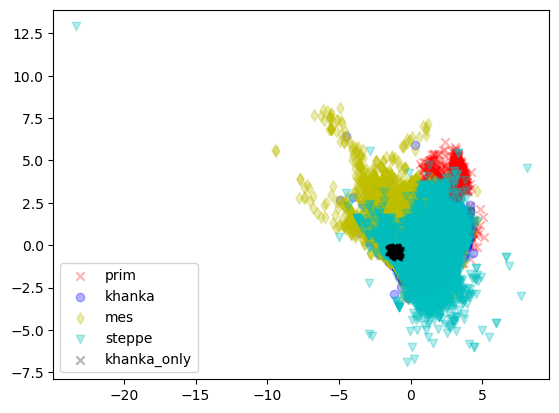

Explained coef ratio (LDA) for prim_khanka_mes_steppe_khanka_only: [0.58944109 0.31718277]

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.07906371150135864
wc2.1_30s_bio_16 = 0.07706395469607898
wc2.1_30s_bio_18 = 0.07632374009754811
wc2.1_30s_bio_13 = 0.06700110564049865
wc2.1_30s_bio_4 = 0.061036608798556574
wc2.1_30s_bio_8 = 0.059756317407699294
wc2.1_30s_bio_3 = 0.0536613419541396
wc2.1_30s_elev = 0.053523268830891174
wc2.1_30s_bio_10 = 0.05350609753857121
wc2.1_30s_bio_15 = 0.05261716015968631
wc2.1_30s_bio_1 = 0.04407616063409494
wc2.1_30s_bio_2 = 0.04344030557358841
wc2.1_30s_bio_11 = 0.041566147265704255
wc2.1_30s_bio_9 = 0.04056595105209752
wc2.1_30s_bio_7 = 0.03868798352378168
wc2.1_30s_bio_5 = 0.03491371943535549
wc2.1_30s_bio_6 = 0.03416109172133544
wc2.1_30s_bio_17 = 0.033741199663541846
wc2.1_30s_bio_19 = 0.030658833827846448
wc2.1_30s_bio_14 = 0.02463530067762551


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 4
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 2
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 6
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 3
wc2.1_30s_bio_5: 5
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_12: 0.09705847456016349
wc2.1_30s_bio_18: 0.09307765730786573
wc2.1_30s_bio_16: 0.0771863992932836
wc2.1_30s_bio_8: 0.07365462276995759
wc2.1_30s_bio_4: 0.07295435040244053
wc2.1_30s_bio_15: 0.07086890926178

Balanced accuracy estimation for the best feature subset:

[0.4032903  0.50774817 0.52889596 0.474079   0.42492175]


Balanced accuracy estimation for all features in the experiment:

[0.41205748 0.50886525 0.5421519  0.49341383 0.41484686]


Descriptive measures for: prim

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,189.634839,237.299660,135.801519,304.916067,47.261626,38.895736,111.786805,849.249268,-10.435776,12.891612,-3.026228,7.679796,35.468847,-15.751444,19.717404,959.159796,28.671383,9.689662,1.129747,1393.671782
std,162.791107,83.656279,110.777296,125.248259,33.040779,32.520873,43.266987,488.725555,9.981820,3.912934,13.782424,7.763394,12.873506,11.331407,4.610199,418.746280,5.691237,2.629211,5.483864,996.711260
min,0.000000,2.000000,0.000000,15.000000,4.243470,0.000000,6.000000,28.000000,-44.083340,-3.266670,-39.833340,-12.800000,1.000000,-49.300000,0.500000,0.000000,12.006580,1.000000,-21.645830,0.000000
25%,32.000000,190.000000,26.000000,205.000000,20.377660,7.000000,77.000000,407.000000,-17.550000,9.983330,-14.866670,1.150000,24.000000,-24.800000,16.500000,610.042660,24.524350,7.441670,-1.537500,504.000000
50%,126.000000,240.000000,100.000000,290.000000,31.305180,30.000000,109.000000,717.000000,-7.300000,13.100000,-3.433330,8.483330,29.800000,-11.300000,19.800000,723.254820,28.975380,9.450000,1.266670,1314.000000
75%,349.000000,275.000000,250.000000,417.000000,70.742520,69.000000,150.000000,1342.000000,-2.650000,15.750000,9.950000,14.666670,46.000000,-6.600000,23.500000,1295.980590,32.428940,11.758330,4.854170,2140.000000
max,1139.000000,904.000000,466.000000,1242.000000,144.378720,143.000000,424.000000,2757.000000,14.533330,31.516670,30.200000,28.266670,72.000000,9.400000,40.200000,2373.020510,100.000000,18.116670,22.433330,6113.000000


Descriptive measures for: khanka

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000
mean,37.219835,262.054704,32.045071,266.237519,83.833425,8.855013,105.071896,488.299220,-15.519899,16.824554,-13.290332,16.454236,47.170746,-22.982485,24.188261,1314.392744,25.598653,11.907524,1.295339,688.124982
std,36.346644,103.447003,29.645741,108.031896,26.817814,8.676208,44.518874,219.735302,8.061791,3.487777,7.512963,3.631747,8.219605,8.662659,3.247053,278.700474,4.338725,2.002580,5.121019,664.917882
min,0.000000,9.000000,0.000000,9.000000,9.782320,0.000000,4.000000,17.000000,-43.516670,0.333330,-40.050000,-13.133330,9.000000,-48.700000,5.500000,33.538180,13.567190,4.708330,-17.091670,-96.000000
25%,13.000000,200.000000,11.000000,202.000000,64.780443,3.000000,77.000000,353.000000,-20.983330,14.800000,-18.050000,14.550000,42.100000,-29.300000,22.600000,1150.053590,22.994130,10.591670,-1.591670,222.000000
50%,27.000000,246.000000,23.000000,247.000000,88.197750,6.000000,98.000000,443.000000,-16.416670,16.666670,-14.533330,16.600000,47.300000,-23.900000,24.500000,1320.150025,24.584770,11.900000,0.041670,518.000000
75%,51.000000,301.000000,43.000000,310.000000,105.483975,12.000000,121.000000,567.000000,-11.283330,18.633330,-9.483330,18.416670,53.100000,-18.400000,25.900000,1496.987457,27.439923,13.266670,4.041670,895.000000
max,924.000000,1445.000000,403.000000,1615.000000,152.057310,131.000000,669.000000,3726.000000,24.533330,32.116660,27.250000,32.116660,72.100000,19.200000,41.300000,2352.675050,87.314820,20.375000,27.141670,5717.000000


Descriptive measures for: mes

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000
mean,85.160506,432.715358,78.573937,447.181948,73.156115,22.143242,175.931458,910.793146,-7.977805,19.603347,-6.523144,18.874319,40.640543,-14.657936,25.982607,1121.597499,26.194027,10.470154,6.291203,441.407809
std,79.277942,213.009386,69.508047,223.656142,25.814448,20.798361,90.526854,494.403225,10.076837,3.917764,9.564792,4.097377,9.536667,11.077272,3.281410,301.606217,3.784172,2.115783,6.503843,491.428184
min,1.000000,0.000000,0.000000,9.000000,6.184340,0.000000,4.000000,17.000000,-43.300000,-1.150000,-39.866670,-13.633330,1.000000,-48.200000,0.500000,0.000000,13.160650,1.000000,-15.995830,-96.000000
25%,28.000000,256.000000,25.000000,258.000000,53.261330,7.000000,103.000000,497.000000,-15.916670,16.750000,-14.150000,16.583330,33.400000,-23.500000,24.100000,899.345700,23.561150,8.958330,0.704170,116.000000
50%,68.000000,369.000000,61.000000,374.000000,76.155860,17.000000,147.000000,719.000000,-5.616670,19.600000,-5.033330,19.083330,37.900000,-12.400000,26.100000,1033.041500,26.314620,10.358330,7.037500,291.000000
75%,111.000000,625.000000,107.000000,652.000000,91.374020,30.000000,254.000000,1296.000000,-0.166670,22.700000,0.533330,22.066670,47.500000,-5.900000,28.300000,1331.616460,28.638150,11.841670,11.416670,591.000000
max,806.000000,2565.000000,739.000000,2565.000000,152.057310,196.000000,1011.000000,4568.000000,25.900000,35.816670,35.816670,32.116660,72.000000,22.200000,44.400000,2340.031980,100.000000,17.875000,26.437500,5407.000000


Descriptive measures for: steppe

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,34545.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000
mean,470.504212,241.324996,54.592728,214.114759,83.393980,15.943571,82.727052,427.461380,26.690272,19.696862,-7.398500,13.993623,42.006826,-16.062192,22.417914,1113.695132,83.739025,16.911055,3.201332,862.509007
std,1852.248324,624.190583,64.553807,108.862268,58.552176,27.682427,42.269578,257.188589,177.216979,63.436816,12.123158,7.330101,12.246427,16.815376,10.120073,427.708614,246.082121,51.717121,6.017297,770.447171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.483330,-38.333330,-38.783330,-29.350000,-27.533330,-48.700000,-44.200000,-7.700000,13.370790,1.000000,-18.962500,-96.000000
25%,13.000000,148.000000,11.000000,162.000000,42.654130,3.000000,61.000000,303.000000,-19.516670,14.183330,-16.783330,13.033330,36.100000,-27.400000,22.000000,844.816393,23.914248,10.708330,-1.050000,315.250000
50%,35.000000,197.000000,31.000000,204.000000,77.618385,9.000000,77.000000,386.000000,-13.400000,16.616670,-11.100000,15.800000,44.200000,-20.300000,24.500000,1199.631285,27.044005,12.458330,2.091670,660.000000
75%,90.000000,243.000000,71.000000,248.000000,109.367910,18.000000,98.000000,487.000000,-2.816670,18.650000,-0.237498,17.600000,50.600000,-9.800000,26.600000,1418.695680,33.175207,14.141670,8.141670,1200.750000
max,25043.000000,21850.000000,614.000000,1418.000000,749.000000,811.000000,514.000000,3157.000000,2261.000000,2200.000000,31.300000,32.116660,72.100000,69.900000,41.300000,2366.514890,2244.012700,803.505000,37.927930,5785.000000


Descriptive measures for: khanka_only

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,27.378462,299.578462,27.376923,310.447692,80.132530,6.375385,116.143077,591.510769,-13.423359,19.676179,-13.339333,19.163847,47.991692,-22.117692,25.874000,1340.407029,24.285833,11.651794,4.396141,113.287692
std,2.978841,7.637239,2.975155,7.777008,2.282573,0.791330,2.214149,19.405511,0.613025,0.329514,0.720229,0.415732,1.123687,0.946347,0.351511,27.167626,0.577038,0.268841,0.394718,71.039424
min,22.000000,285.000000,22.000000,294.000000,73.042260,5.000000,112.000000,555.000000,-14.866670,18.083330,-14.866670,18.083330,45.800000,-24.800000,24.800000,1279.418330,22.993200,11.050000,2.866670,17.000000
25%,25.000000,294.000000,25.000000,305.000000,78.794240,6.000000,115.000000,577.000000,-13.916670,19.533330,-13.816670,18.950000,47.000000,-22.900000,25.700000,1318.746830,23.838800,11.441670,4.047915,64.000000
50%,27.000000,299.000000,27.000000,311.000000,80.185460,6.000000,116.000000,589.000000,-13.466670,19.750000,-13.283330,19.133330,47.900000,-22.200000,25.800000,1340.153990,24.270470,11.575000,4.533330,93.500000
75%,29.000000,302.000000,29.000000,317.000000,81.574232,7.000000,117.000000,605.000000,-12.866670,19.900000,-12.850000,19.400000,48.900000,-21.200000,26.100000,1356.233890,24.627063,11.833330,4.711457,141.000000
max,38.000000,339.000000,38.000000,339.000000,87.148160,9.000000,123.000000,657.000000,-12.233330,20.416670,-10.100000,20.150000,50.800000,-19.900000,26.800000,1417.089110,26.057350,12.341670,5.262500,505.000000


Pair analysis. Feature set name: WC21

Datasets to compare: prim, khanka

Feature importances of all considered features:

wc2.1_30s_bio_7 = 0.10588992620570381
wc2.1_30s_bio_4 = 0.10544695671399938
wc2.1_30s_bio_8 = 0.09389468006142006
wc2.1_30s_bio_15 = 0.08756818461205876
wc2.1_30s_bio_19 = 0.08104483658305531
wc2.1_30s_bio_14 = 0.0786031195172557
wc2.1_30s_bio_9 = 0.044991056023875924
wc2.1_30s_bio_5 = 0.04215870359118338
wc2.1_30s_bio_10 = 0.03863361889656039
wc2.1_30s_bio_17 = 0.037932460549600214
wc2.1_30s_bio_1 = 0.03742606751989641
wc2.1_30s_elev = 0.03216076483383986
wc2.1_30s_bio_3 = 0.030693811669831806
wc2.1_30s_bio_2 = 0.029410835764599932
wc2.1_30s_bio_12 = 0.02837018102051265
wc2.1_30s_bio_13 = 0.02604514642578862
wc2.1_30s_bio_16 = 0.025990562619502392
wc2.1_30s_bio_11 = 0.025966144109773093
wc2.1_30s_bio_18 = 0.025568958668000043
wc2.1_30s_bio_6 = 0.02220398461354226


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 1
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_19: 0.1111050036469662
wc2.1_30s_bio_8: 0.10257867294736117
wc2.1_30s_bio_4: 0.09650495717632532
wc2.1_30s_bio_7: 0.07915977874508019
wc2.1_30s_bio_14: 0.07734708545639978
wc2.1_30s_bio_17: 0.055530442472869

Balanced accuracy estimation for the best feature subset:

[0.58390862 0.85439638 0.8803832  0.7671907  0.63704662]


Balanced accuracy estimation for all features in the experiment:

[0.5957926  0.85567098 0.87924064 0.76727858 0.63614586]


Descriptive measures for: prim

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,189.634839,237.299660,135.801519,304.916067,47.261626,38.895736,111.786805,849.249268,-10.435776,12.891612,-3.026228,7.679796,35.468847,-15.751444,19.717404,959.159796,28.671383,9.689662,1.129747,1393.671782
std,162.791107,83.656279,110.777296,125.248259,33.040779,32.520873,43.266987,488.725555,9.981820,3.912934,13.782424,7.763394,12.873506,11.331407,4.610199,418.746280,5.691237,2.629211,5.483864,996.711260
min,0.000000,2.000000,0.000000,15.000000,4.243470,0.000000,6.000000,28.000000,-44.083340,-3.266670,-39.833340,-12.800000,1.000000,-49.300000,0.500000,0.000000,12.006580,1.000000,-21.645830,0.000000
25%,32.000000,190.000000,26.000000,205.000000,20.377660,7.000000,77.000000,407.000000,-17.550000,9.983330,-14.866670,1.150000,24.000000,-24.800000,16.500000,610.042660,24.524350,7.441670,-1.537500,504.000000
50%,126.000000,240.000000,100.000000,290.000000,31.305180,30.000000,109.000000,717.000000,-7.300000,13.100000,-3.433330,8.483330,29.800000,-11.300000,19.800000,723.254820,28.975380,9.450000,1.266670,1314.000000
75%,349.000000,275.000000,250.000000,417.000000,70.742520,69.000000,150.000000,1342.000000,-2.650000,15.750000,9.950000,14.666670,46.000000,-6.600000,23.500000,1295.980590,32.428940,11.758330,4.854170,2140.000000
max,1139.000000,904.000000,466.000000,1242.000000,144.378720,143.000000,424.000000,2757.000000,14.533330,31.516670,30.200000,28.266670,72.000000,9.400000,40.200000,2373.020510,100.000000,18.116670,22.433330,6113.000000


Descriptive measures for: khanka

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000
mean,37.219835,262.054704,32.045071,266.237519,83.833425,8.855013,105.071896,488.299220,-15.519899,16.824554,-13.290332,16.454236,47.170746,-22.982485,24.188261,1314.392744,25.598653,11.907524,1.295339,688.124982
std,36.346644,103.447003,29.645741,108.031896,26.817814,8.676208,44.518874,219.735302,8.061791,3.487777,7.512963,3.631747,8.219605,8.662659,3.247053,278.700474,4.338725,2.002580,5.121019,664.917882
min,0.000000,9.000000,0.000000,9.000000,9.782320,0.000000,4.000000,17.000000,-43.516670,0.333330,-40.050000,-13.133330,9.000000,-48.700000,5.500000,33.538180,13.567190,4.708330,-17.091670,-96.000000
25%,13.000000,200.000000,11.000000,202.000000,64.780443,3.000000,77.000000,353.000000,-20.983330,14.800000,-18.050000,14.550000,42.100000,-29.300000,22.600000,1150.053590,22.994130,10.591670,-1.591670,222.000000
50%,27.000000,246.000000,23.000000,247.000000,88.197750,6.000000,98.000000,443.000000,-16.416670,16.666670,-14.533330,16.600000,47.300000,-23.900000,24.500000,1320.150025,24.584770,11.900000,0.041670,518.000000
75%,51.000000,301.000000,43.000000,310.000000,105.483975,12.000000,121.000000,567.000000,-11.283330,18.633330,-9.483330,18.416670,53.100000,-18.400000,25.900000,1496.987457,27.439923,13.266670,4.041670,895.000000
max,924.000000,1445.000000,403.000000,1615.000000,152.057310,131.000000,669.000000,3726.000000,24.533330,32.116660,27.250000,32.116660,72.100000,19.200000,41.300000,2352.675050,87.314820,20.375000,27.141670,5717.000000


Datasets to compare: prim, mes

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.1532680335668531
wc2.1_30s_bio_10 = 0.09766886848444785
wc2.1_30s_bio_4 = 0.09117866347239523
wc2.1_30s_elev = 0.08029962913381887
wc2.1_30s_bio_5 = 0.0695532829936585
wc2.1_30s_bio_18 = 0.052214757601733504
wc2.1_30s_bio_15 = 0.05079042458076232
wc2.1_30s_bio_19 = 0.04296292089771851
wc2.1_30s_bio_7 = 0.04271100079809572
wc2.1_30s_bio_3 = 0.03802637824927655
wc2.1_30s_bio_12 = 0.033609842728216086
wc2.1_30s_bio_13 = 0.0332930349599792
wc2.1_30s_bio_16 = 0.03205662493721769
wc2.1_30s_bio_9 = 0.0311156849776272
wc2.1_30s_bio_1 = 0.03005069633667307
wc2.1_30s_bio_11 = 0.02894561922428055
wc2.1_30s_bio_2 = 0.025801312374785456
wc2.1_30s_bio_6 = 0.024601681593340984
wc2.1_30s_bio_17 = 0.024228216275542003
wc2.1_30s_bio_14 = 0.017623326813577596


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 6
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 9
wc2.1_30s_bio_13: 2
wc2.1_30s_bio_12: 4
wc2.1_30s_bio_11: 5
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 8
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 7
wc2.1_30s_bio_1: 3
wc2.1_30s_elev: 1
wc2.1_30s_bio_8: 0.17244931321311183
wc2.1_30s_bio_10: 0.15236437241028072
wc2.1_30s_bio_4: 0.13963631108384014
wc2.1_30s_bio_5: 0.08198584403405626
wc2.1_30s_elev: 0.07416186394504234
wc2.1_30s_bio_15: 0.0701239585953784

Balanced accuracy estimation for the best feature subset:

[0.61199524 0.87931054 0.96268183 0.7633893  0.67616032]


Balanced accuracy estimation for all features in the experiment:

[0.61224245 0.87861918 0.96337476 0.76319132 0.67502331]


Descriptive measures for: prim

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,189.634839,237.299660,135.801519,304.916067,47.261626,38.895736,111.786805,849.249268,-10.435776,12.891612,-3.026228,7.679796,35.468847,-15.751444,19.717404,959.159796,28.671383,9.689662,1.129747,1393.671782
std,162.791107,83.656279,110.777296,125.248259,33.040779,32.520873,43.266987,488.725555,9.981820,3.912934,13.782424,7.763394,12.873506,11.331407,4.610199,418.746280,5.691237,2.629211,5.483864,996.711260
min,0.000000,2.000000,0.000000,15.000000,4.243470,0.000000,6.000000,28.000000,-44.083340,-3.266670,-39.833340,-12.800000,1.000000,-49.300000,0.500000,0.000000,12.006580,1.000000,-21.645830,0.000000
25%,32.000000,190.000000,26.000000,205.000000,20.377660,7.000000,77.000000,407.000000,-17.550000,9.983330,-14.866670,1.150000,24.000000,-24.800000,16.500000,610.042660,24.524350,7.441670,-1.537500,504.000000
50%,126.000000,240.000000,100.000000,290.000000,31.305180,30.000000,109.000000,717.000000,-7.300000,13.100000,-3.433330,8.483330,29.800000,-11.300000,19.800000,723.254820,28.975380,9.450000,1.266670,1314.000000
75%,349.000000,275.000000,250.000000,417.000000,70.742520,69.000000,150.000000,1342.000000,-2.650000,15.750000,9.950000,14.666670,46.000000,-6.600000,23.500000,1295.980590,32.428940,11.758330,4.854170,2140.000000
max,1139.000000,904.000000,466.000000,1242.000000,144.378720,143.000000,424.000000,2757.000000,14.533330,31.516670,30.200000,28.266670,72.000000,9.400000,40.200000,2373.020510,100.000000,18.116670,22.433330,6113.000000


Descriptive measures for: mes

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000
mean,85.160506,432.715358,78.573937,447.181948,73.156115,22.143242,175.931458,910.793146,-7.977805,19.603347,-6.523144,18.874319,40.640543,-14.657936,25.982607,1121.597499,26.194027,10.470154,6.291203,441.407809
std,79.277942,213.009386,69.508047,223.656142,25.814448,20.798361,90.526854,494.403225,10.076837,3.917764,9.564792,4.097377,9.536667,11.077272,3.281410,301.606217,3.784172,2.115783,6.503843,491.428184
min,1.000000,0.000000,0.000000,9.000000,6.184340,0.000000,4.000000,17.000000,-43.300000,-1.150000,-39.866670,-13.633330,1.000000,-48.200000,0.500000,0.000000,13.160650,1.000000,-15.995830,-96.000000
25%,28.000000,256.000000,25.000000,258.000000,53.261330,7.000000,103.000000,497.000000,-15.916670,16.750000,-14.150000,16.583330,33.400000,-23.500000,24.100000,899.345700,23.561150,8.958330,0.704170,116.000000
50%,68.000000,369.000000,61.000000,374.000000,76.155860,17.000000,147.000000,719.000000,-5.616670,19.600000,-5.033330,19.083330,37.900000,-12.400000,26.100000,1033.041500,26.314620,10.358330,7.037500,291.000000
75%,111.000000,625.000000,107.000000,652.000000,91.374020,30.000000,254.000000,1296.000000,-0.166670,22.700000,0.533330,22.066670,47.500000,-5.900000,28.300000,1331.616460,28.638150,11.841670,11.416670,591.000000
max,806.000000,2565.000000,739.000000,2565.000000,152.057310,196.000000,1011.000000,4568.000000,25.900000,35.816670,35.816670,32.116660,72.000000,22.200000,44.400000,2340.031980,100.000000,17.875000,26.437500,5407.000000


Datasets to compare: prim, steppe

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.12139711709163567
wc2.1_30s_bio_15 = 0.06758120779786772
wc2.1_30s_bio_17 = 0.059085742382954845
wc2.1_30s_bio_2 = 0.058298028260027474
wc2.1_30s_bio_14 = 0.05767042194518899
wc2.1_30s_bio_1 = 0.056607962303428856
wc2.1_30s_bio_16 = 0.05507733549188987
wc2.1_30s_bio_8 = 0.051094301402556254
wc2.1_30s_bio_10 = 0.050034893983478976
wc2.1_30s_bio_5 = 0.048743037723780906
wc2.1_30s_elev = 0.046730971384830886
wc2.1_30s_bio_4 = 0.04558097150226912
wc2.1_30s_bio_13 = 0.04262429580005517
wc2.1_30s_bio_3 = 0.03833580619254336
wc2.1_30s_bio_19 = 0.03820765808500641
wc2.1_30s_bio_11 = 0.037844686049918946
wc2.1_30s_bio_9 = 0.033318656455881314
wc2.1_30s_bio_7 = 0.03293091070627619
wc2.1_30s_bio_6 = 0.03173276089160645
wc2.1_30s_bio_18 = 0.02710323454880258


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 3
wc2.1_30s_bio_18: 7
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 1
wc2.1_30s_bio_13: 4
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 2
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 5
wc2.1_30s_bio_6: 6
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_12: 0.11957287413204182
wc2.1_30s_bio_15: 0.08400693300565208
wc2.1_30s_bio_2: 0.08350051649250333
wc2.1_30s_bio_16: 0.08131985298424996
wc2.1_30s_bio_14: 0.07650464590264164
wc2.1_30s_bio_17: 0.067737600902

Balanced accuracy estimation for the best feature subset:

[0.55624578 0.8539053  0.90760967 0.69808979 0.61455703]


Balanced accuracy estimation for all features in the experiment:

[0.55743202 0.8542429  0.90925977 0.69726418 0.62164785]


Descriptive measures for: prim

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,189.634839,237.299660,135.801519,304.916067,47.261626,38.895736,111.786805,849.249268,-10.435776,12.891612,-3.026228,7.679796,35.468847,-15.751444,19.717404,959.159796,28.671383,9.689662,1.129747,1393.671782
std,162.791107,83.656279,110.777296,125.248259,33.040779,32.520873,43.266987,488.725555,9.981820,3.912934,13.782424,7.763394,12.873506,11.331407,4.610199,418.746280,5.691237,2.629211,5.483864,996.711260
min,0.000000,2.000000,0.000000,15.000000,4.243470,0.000000,6.000000,28.000000,-44.083340,-3.266670,-39.833340,-12.800000,1.000000,-49.300000,0.500000,0.000000,12.006580,1.000000,-21.645830,0.000000
25%,32.000000,190.000000,26.000000,205.000000,20.377660,7.000000,77.000000,407.000000,-17.550000,9.983330,-14.866670,1.150000,24.000000,-24.800000,16.500000,610.042660,24.524350,7.441670,-1.537500,504.000000
50%,126.000000,240.000000,100.000000,290.000000,31.305180,30.000000,109.000000,717.000000,-7.300000,13.100000,-3.433330,8.483330,29.800000,-11.300000,19.800000,723.254820,28.975380,9.450000,1.266670,1314.000000
75%,349.000000,275.000000,250.000000,417.000000,70.742520,69.000000,150.000000,1342.000000,-2.650000,15.750000,9.950000,14.666670,46.000000,-6.600000,23.500000,1295.980590,32.428940,11.758330,4.854170,2140.000000
max,1139.000000,904.000000,466.000000,1242.000000,144.378720,143.000000,424.000000,2757.000000,14.533330,31.516670,30.200000,28.266670,72.000000,9.400000,40.200000,2373.020510,100.000000,18.116670,22.433330,6113.000000


Descriptive measures for: steppe

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,34545.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000
mean,470.504212,241.324996,54.592728,214.114759,83.393980,15.943571,82.727052,427.461380,26.690272,19.696862,-7.398500,13.993623,42.006826,-16.062192,22.417914,1113.695132,83.739025,16.911055,3.201332,862.509007
std,1852.248324,624.190583,64.553807,108.862268,58.552176,27.682427,42.269578,257.188589,177.216979,63.436816,12.123158,7.330101,12.246427,16.815376,10.120073,427.708614,246.082121,51.717121,6.017297,770.447171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.483330,-38.333330,-38.783330,-29.350000,-27.533330,-48.700000,-44.200000,-7.700000,13.370790,1.000000,-18.962500,-96.000000
25%,13.000000,148.000000,11.000000,162.000000,42.654130,3.000000,61.000000,303.000000,-19.516670,14.183330,-16.783330,13.033330,36.100000,-27.400000,22.000000,844.816393,23.914248,10.708330,-1.050000,315.250000
50%,35.000000,197.000000,31.000000,204.000000,77.618385,9.000000,77.000000,386.000000,-13.400000,16.616670,-11.100000,15.800000,44.200000,-20.300000,24.500000,1199.631285,27.044005,12.458330,2.091670,660.000000
75%,90.000000,243.000000,71.000000,248.000000,109.367910,18.000000,98.000000,487.000000,-2.816670,18.650000,-0.237498,17.600000,50.600000,-9.800000,26.600000,1418.695680,33.175207,14.141670,8.141670,1200.750000
max,25043.000000,21850.000000,614.000000,1418.000000,749.000000,811.000000,514.000000,3157.000000,2261.000000,2200.000000,31.300000,32.116660,72.100000,69.900000,41.300000,2366.514890,2244.012700,803.505000,37.927930,5785.000000


Datasets to compare: prim, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_10 = 0.1570561780509081
wc2.1_30s_bio_8 = 0.13651512149063133
wc2.1_30s_elev = 0.07961622557378918
wc2.1_30s_bio_5 = 0.06852184163054736
wc2.1_30s_bio_11 = 0.06586446750810622
wc2.1_30s_bio_4 = 0.05830180334461201
wc2.1_30s_bio_18 = 0.05651046912762856
wc2.1_30s_bio_1 = 0.04721322585610258
wc2.1_30s_bio_12 = 0.04716233770487663
wc2.1_30s_bio_16 = 0.04161530942974151
wc2.1_30s_bio_15 = 0.036498953118754764
wc2.1_30s_bio_6 = 0.03579649218516391
wc2.1_30s_bio_7 = 0.03524995143053823
wc2.1_30s_bio_19 = 0.031665505802675235
wc2.1_30s_bio_9 = 0.027819912609921754
wc2.1_30s_bio_17 = 0.0213323407212446
wc2.1_30s_bio_3 = 0.01666183656476067
wc2.1_30s_bio_13 = 0.015852054399331586
wc2.1_30s_bio_14 = 0.015504713113816073
wc2.1_30s_bio_2 = 0.005241260336849746


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 6
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 5
wc2.1_30s_bio_16: 7
wc2.1_30s_bio_15: 2
wc2.1_30s_bio_14: 8
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 4
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 3
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 9
wc2.1_30s_bio_2: 10
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_10: 0.17529669497885927
wc2.1_30s_bio_8: 0.17037176008853908
wc2.1_30s_bio_4: 0.09487090653049261
wc2.1_30s_bio_11: 0.08874925661694374
wc2.1_30s_bio_1: 0.08553997364141756
wc2.1_30s_bio_18: 0.0808125654259

Balanced accuracy estimation for the best feature subset:

[1.         1.         1.         1.         0.99131877]


Balanced accuracy estimation for all features in the experiment:

[1.         1.         1.         1.         0.99171434]


Descriptive measures for: prim

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,189.634839,237.299660,135.801519,304.916067,47.261626,38.895736,111.786805,849.249268,-10.435776,12.891612,-3.026228,7.679796,35.468847,-15.751444,19.717404,959.159796,28.671383,9.689662,1.129747,1393.671782
std,162.791107,83.656279,110.777296,125.248259,33.040779,32.520873,43.266987,488.725555,9.981820,3.912934,13.782424,7.763394,12.873506,11.331407,4.610199,418.746280,5.691237,2.629211,5.483864,996.711260
min,0.000000,2.000000,0.000000,15.000000,4.243470,0.000000,6.000000,28.000000,-44.083340,-3.266670,-39.833340,-12.800000,1.000000,-49.300000,0.500000,0.000000,12.006580,1.000000,-21.645830,0.000000
25%,32.000000,190.000000,26.000000,205.000000,20.377660,7.000000,77.000000,407.000000,-17.550000,9.983330,-14.866670,1.150000,24.000000,-24.800000,16.500000,610.042660,24.524350,7.441670,-1.537500,504.000000
50%,126.000000,240.000000,100.000000,290.000000,31.305180,30.000000,109.000000,717.000000,-7.300000,13.100000,-3.433330,8.483330,29.800000,-11.300000,19.800000,723.254820,28.975380,9.450000,1.266670,1314.000000
75%,349.000000,275.000000,250.000000,417.000000,70.742520,69.000000,150.000000,1342.000000,-2.650000,15.750000,9.950000,14.666670,46.000000,-6.600000,23.500000,1295.980590,32.428940,11.758330,4.854170,2140.000000
max,1139.000000,904.000000,466.000000,1242.000000,144.378720,143.000000,424.000000,2757.000000,14.533330,31.516670,30.200000,28.266670,72.000000,9.400000,40.200000,2373.020510,100.000000,18.116670,22.433330,6113.000000


Descriptive measures for: khanka_only

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,27.378462,299.578462,27.376923,310.447692,80.132530,6.375385,116.143077,591.510769,-13.423359,19.676179,-13.339333,19.163847,47.991692,-22.117692,25.874000,1340.407029,24.285833,11.651794,4.396141,113.287692
std,2.978841,7.637239,2.975155,7.777008,2.282573,0.791330,2.214149,19.405511,0.613025,0.329514,0.720229,0.415732,1.123687,0.946347,0.351511,27.167626,0.577038,0.268841,0.394718,71.039424
min,22.000000,285.000000,22.000000,294.000000,73.042260,5.000000,112.000000,555.000000,-14.866670,18.083330,-14.866670,18.083330,45.800000,-24.800000,24.800000,1279.418330,22.993200,11.050000,2.866670,17.000000
25%,25.000000,294.000000,25.000000,305.000000,78.794240,6.000000,115.000000,577.000000,-13.916670,19.533330,-13.816670,18.950000,47.000000,-22.900000,25.700000,1318.746830,23.838800,11.441670,4.047915,64.000000
50%,27.000000,299.000000,27.000000,311.000000,80.185460,6.000000,116.000000,589.000000,-13.466670,19.750000,-13.283330,19.133330,47.900000,-22.200000,25.800000,1340.153990,24.270470,11.575000,4.533330,93.500000
75%,29.000000,302.000000,29.000000,317.000000,81.574232,7.000000,117.000000,605.000000,-12.866670,19.900000,-12.850000,19.400000,48.900000,-21.200000,26.100000,1356.233890,24.627063,11.833330,4.711457,141.000000
max,38.000000,339.000000,38.000000,339.000000,87.148160,9.000000,123.000000,657.000000,-12.233330,20.416670,-10.100000,20.150000,50.800000,-19.900000,26.800000,1417.089110,26.057350,12.341670,5.262500,505.000000


Datasets to compare: khanka, mes

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.10626835031457152
wc2.1_30s_bio_18 = 0.07965808005058324
wc2.1_30s_bio_16 = 0.07493928940067018
wc2.1_30s_bio_13 = 0.06603143571802456
wc2.1_30s_bio_1 = 0.05491258053491059
wc2.1_30s_elev = 0.05385295064233496
wc2.1_30s_bio_6 = 0.050907096104856796
wc2.1_30s_bio_11 = 0.04879805844030927
wc2.1_30s_bio_4 = 0.04736954345284626
wc2.1_30s_bio_3 = 0.046168386466944704
wc2.1_30s_bio_15 = 0.0455328010894381
wc2.1_30s_bio_2 = 0.04229041650938553
wc2.1_30s_bio_17 = 0.042174482654356256
wc2.1_30s_bio_7 = 0.03974975739681178
wc2.1_30s_bio_9 = 0.038455491317179145
wc2.1_30s_bio_10 = 0.03795304555528083
wc2.1_30s_bio_8 = 0.03693868132395462
wc2.1_30s_bio_19 = 0.031071225637803995
wc2.1_30s_bio_5 = 0.02929931651749658
wc2.1_30s_bio_14 = 0.027629010872241212


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 1
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 2
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_12: 0.10751407501227381
wc2.1_30s_bio_16: 0.09039276444127549
wc2.1_30s_bio_18: 0.07282535476527534
wc2.1_30s_bio_1: 0.06820133702021441
wc2.1_30s_bio_13: 0.06371233118894211
wc2.1_30s_elev: 0.05808500878920

Balanced accuracy estimation for the best feature subset:

[0.65821866 0.70642882 0.61105183 0.71493166 0.65905277]


Balanced accuracy estimation for all features in the experiment:

[0.65680827 0.70853815 0.61024973 0.71616816 0.65777776]


Descriptive measures for: khanka

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000
mean,37.219835,262.054704,32.045071,266.237519,83.833425,8.855013,105.071896,488.299220,-15.519899,16.824554,-13.290332,16.454236,47.170746,-22.982485,24.188261,1314.392744,25.598653,11.907524,1.295339,688.124982
std,36.346644,103.447003,29.645741,108.031896,26.817814,8.676208,44.518874,219.735302,8.061791,3.487777,7.512963,3.631747,8.219605,8.662659,3.247053,278.700474,4.338725,2.002580,5.121019,664.917882
min,0.000000,9.000000,0.000000,9.000000,9.782320,0.000000,4.000000,17.000000,-43.516670,0.333330,-40.050000,-13.133330,9.000000,-48.700000,5.500000,33.538180,13.567190,4.708330,-17.091670,-96.000000
25%,13.000000,200.000000,11.000000,202.000000,64.780443,3.000000,77.000000,353.000000,-20.983330,14.800000,-18.050000,14.550000,42.100000,-29.300000,22.600000,1150.053590,22.994130,10.591670,-1.591670,222.000000
50%,27.000000,246.000000,23.000000,247.000000,88.197750,6.000000,98.000000,443.000000,-16.416670,16.666670,-14.533330,16.600000,47.300000,-23.900000,24.500000,1320.150025,24.584770,11.900000,0.041670,518.000000
75%,51.000000,301.000000,43.000000,310.000000,105.483975,12.000000,121.000000,567.000000,-11.283330,18.633330,-9.483330,18.416670,53.100000,-18.400000,25.900000,1496.987457,27.439923,13.266670,4.041670,895.000000
max,924.000000,1445.000000,403.000000,1615.000000,152.057310,131.000000,669.000000,3726.000000,24.533330,32.116660,27.250000,32.116660,72.100000,19.200000,41.300000,2352.675050,87.314820,20.375000,27.141670,5717.000000


Descriptive measures for: mes

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000
mean,85.160506,432.715358,78.573937,447.181948,73.156115,22.143242,175.931458,910.793146,-7.977805,19.603347,-6.523144,18.874319,40.640543,-14.657936,25.982607,1121.597499,26.194027,10.470154,6.291203,441.407809
std,79.277942,213.009386,69.508047,223.656142,25.814448,20.798361,90.526854,494.403225,10.076837,3.917764,9.564792,4.097377,9.536667,11.077272,3.281410,301.606217,3.784172,2.115783,6.503843,491.428184
min,1.000000,0.000000,0.000000,9.000000,6.184340,0.000000,4.000000,17.000000,-43.300000,-1.150000,-39.866670,-13.633330,1.000000,-48.200000,0.500000,0.000000,13.160650,1.000000,-15.995830,-96.000000
25%,28.000000,256.000000,25.000000,258.000000,53.261330,7.000000,103.000000,497.000000,-15.916670,16.750000,-14.150000,16.583330,33.400000,-23.500000,24.100000,899.345700,23.561150,8.958330,0.704170,116.000000
50%,68.000000,369.000000,61.000000,374.000000,76.155860,17.000000,147.000000,719.000000,-5.616670,19.600000,-5.033330,19.083330,37.900000,-12.400000,26.100000,1033.041500,26.314620,10.358330,7.037500,291.000000
75%,111.000000,625.000000,107.000000,652.000000,91.374020,30.000000,254.000000,1296.000000,-0.166670,22.700000,0.533330,22.066670,47.500000,-5.900000,28.300000,1331.616460,28.638150,11.841670,11.416670,591.000000
max,806.000000,2565.000000,739.000000,2565.000000,152.057310,196.000000,1011.000000,4568.000000,25.900000,35.816670,35.816670,32.116660,72.000000,22.200000,44.400000,2340.031980,100.000000,17.875000,26.437500,5407.000000


Datasets to compare: khanka, steppe

Feature importances of all considered features:

wc2.1_30s_bio_3 = 0.08726138061434448
wc2.1_30s_bio_18 = 0.08392001589091512
wc2.1_30s_bio_4 = 0.06613476096331454
wc2.1_30s_bio_13 = 0.057157211441292134
wc2.1_30s_bio_9 = 0.05688815005715221
wc2.1_30s_bio_15 = 0.05506487551800035
wc2.1_30s_elev = 0.054513084611188374
wc2.1_30s_bio_16 = 0.05178951910698406
wc2.1_30s_bio_11 = 0.04990012600598897
wc2.1_30s_bio_12 = 0.04982559437732222
wc2.1_30s_bio_1 = 0.048750418409213535
wc2.1_30s_bio_10 = 0.044038811053495414
wc2.1_30s_bio_2 = 0.04298787680759522
wc2.1_30s_bio_8 = 0.04234166087638119
wc2.1_30s_bio_7 = 0.0405698797208781
wc2.1_30s_bio_19 = 0.03958567613482813
wc2.1_30s_bio_6 = 0.039559941239556896
wc2.1_30s_bio_5 = 0.035182987053991185
wc2.1_30s_bio_17 = 0.03491371670579782
wc2.1_30s_bio_14 = 0.01961431341176007


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 12
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 15
wc2.1_30s_bio_16: 7
wc2.1_30s_bio_15: 2
wc2.1_30s_bio_14: 18
wc2.1_30s_bio_13: 11
wc2.1_30s_bio_12: 4
wc2.1_30s_bio_11: 8
wc2.1_30s_bio_10: 13
wc2.1_30s_bio_9: 3
wc2.1_30s_bio_8: 9
wc2.1_30s_bio_7: 14
wc2.1_30s_bio_6: 16
wc2.1_30s_bio_5: 17
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 10
wc2.1_30s_bio_1: 5
wc2.1_30s_elev: 6
wc2.1_30s_bio_4: 0.34696928608335154
wc2.1_30s_bio_3: 0.3418909682853874
wc2.1_30s_bio_18: 0.3111397456312611


Balanced accuracy estimation for the best feature subset:

[0.65775803 0.66690013 0.63005837 0.64676233 0.57988323]


Balanced accuracy estimation for all features in the experiment:

[0.65575294 0.66708619 0.63260198 0.64041878 0.57875639]


Descriptive measures for: khanka

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000
mean,37.219835,262.054704,32.045071,266.237519,83.833425,8.855013,105.071896,488.299220,-15.519899,16.824554,-13.290332,16.454236,47.170746,-22.982485,24.188261,1314.392744,25.598653,11.907524,1.295339,688.124982
std,36.346644,103.447003,29.645741,108.031896,26.817814,8.676208,44.518874,219.735302,8.061791,3.487777,7.512963,3.631747,8.219605,8.662659,3.247053,278.700474,4.338725,2.002580,5.121019,664.917882
min,0.000000,9.000000,0.000000,9.000000,9.782320,0.000000,4.000000,17.000000,-43.516670,0.333330,-40.050000,-13.133330,9.000000,-48.700000,5.500000,33.538180,13.567190,4.708330,-17.091670,-96.000000
25%,13.000000,200.000000,11.000000,202.000000,64.780443,3.000000,77.000000,353.000000,-20.983330,14.800000,-18.050000,14.550000,42.100000,-29.300000,22.600000,1150.053590,22.994130,10.591670,-1.591670,222.000000
50%,27.000000,246.000000,23.000000,247.000000,88.197750,6.000000,98.000000,443.000000,-16.416670,16.666670,-14.533330,16.600000,47.300000,-23.900000,24.500000,1320.150025,24.584770,11.900000,0.041670,518.000000
75%,51.000000,301.000000,43.000000,310.000000,105.483975,12.000000,121.000000,567.000000,-11.283330,18.633330,-9.483330,18.416670,53.100000,-18.400000,25.900000,1496.987457,27.439923,13.266670,4.041670,895.000000
max,924.000000,1445.000000,403.000000,1615.000000,152.057310,131.000000,669.000000,3726.000000,24.533330,32.116660,27.250000,32.116660,72.100000,19.200000,41.300000,2352.675050,87.314820,20.375000,27.141670,5717.000000


Descriptive measures for: steppe

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,34545.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000
mean,470.504212,241.324996,54.592728,214.114759,83.393980,15.943571,82.727052,427.461380,26.690272,19.696862,-7.398500,13.993623,42.006826,-16.062192,22.417914,1113.695132,83.739025,16.911055,3.201332,862.509007
std,1852.248324,624.190583,64.553807,108.862268,58.552176,27.682427,42.269578,257.188589,177.216979,63.436816,12.123158,7.330101,12.246427,16.815376,10.120073,427.708614,246.082121,51.717121,6.017297,770.447171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.483330,-38.333330,-38.783330,-29.350000,-27.533330,-48.700000,-44.200000,-7.700000,13.370790,1.000000,-18.962500,-96.000000
25%,13.000000,148.000000,11.000000,162.000000,42.654130,3.000000,61.000000,303.000000,-19.516670,14.183330,-16.783330,13.033330,36.100000,-27.400000,22.000000,844.816393,23.914248,10.708330,-1.050000,315.250000
50%,35.000000,197.000000,31.000000,204.000000,77.618385,9.000000,77.000000,386.000000,-13.400000,16.616670,-11.100000,15.800000,44.200000,-20.300000,24.500000,1199.631285,27.044005,12.458330,2.091670,660.000000
75%,90.000000,243.000000,71.000000,248.000000,109.367910,18.000000,98.000000,487.000000,-2.816670,18.650000,-0.237498,17.600000,50.600000,-9.800000,26.600000,1418.695680,33.175207,14.141670,8.141670,1200.750000
max,25043.000000,21850.000000,614.000000,1418.000000,749.000000,811.000000,514.000000,3157.000000,2261.000000,2200.000000,31.300000,32.116660,72.100000,69.900000,41.300000,2366.514890,2244.012700,803.505000,37.927930,5785.000000


Datasets to compare: khanka, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_4 = 0.09445764312172919
wc2.1_30s_bio_11 = 0.0704824284135778
wc2.1_30s_bio_15 = 0.06673267940281533
wc2.1_30s_bio_7 = 0.06382003424434492
wc2.1_30s_bio_6 = 0.05896976242188022
wc2.1_30s_bio_16 = 0.058317195429987596
wc2.1_30s_bio_9 = 0.05819402113683049
wc2.1_30s_bio_10 = 0.05678526704838939
wc2.1_30s_bio_12 = 0.05514852761437318
wc2.1_30s_bio_13 = 0.04965889790614532
wc2.1_30s_bio_1 = 0.048891909870985524
wc2.1_30s_bio_3 = 0.047474990555256884
wc2.1_30s_bio_2 = 0.04290952837077516
wc2.1_30s_elev = 0.041860368538970204
wc2.1_30s_bio_18 = 0.03826995427189303
wc2.1_30s_bio_8 = 0.03815451651329823
wc2.1_30s_bio_5 = 0.03241469740579449
wc2.1_30s_bio_17 = 0.028356502651637694
wc2.1_30s_bio_19 = 0.027411117577124496
wc2.1_30s_bio_14 = 0.021689957504190973


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 2
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 1
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_4: 0.09217832372152991
wc2.1_30s_bio_6: 0.06951500462195251
wc2.1_30s_bio_12: 0.06429118845642891
wc2.1_30s_bio_9: 0.06375771692337727
wc2.1_30s_bio_11: 0.06360688267651439
wc2.1_30s_bio_10: 0.06174033192972

Balanced accuracy estimation for the best feature subset:

[0.76193599 0.54509918 0.59725449 0.76294874 0.74934139]


Balanced accuracy estimation for all features in the experiment:

[0.80703517 0.55637397 0.58597969 0.72169572 0.82450638]


Descriptive measures for: khanka

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000
mean,37.219835,262.054704,32.045071,266.237519,83.833425,8.855013,105.071896,488.299220,-15.519899,16.824554,-13.290332,16.454236,47.170746,-22.982485,24.188261,1314.392744,25.598653,11.907524,1.295339,688.124982
std,36.346644,103.447003,29.645741,108.031896,26.817814,8.676208,44.518874,219.735302,8.061791,3.487777,7.512963,3.631747,8.219605,8.662659,3.247053,278.700474,4.338725,2.002580,5.121019,664.917882
min,0.000000,9.000000,0.000000,9.000000,9.782320,0.000000,4.000000,17.000000,-43.516670,0.333330,-40.050000,-13.133330,9.000000,-48.700000,5.500000,33.538180,13.567190,4.708330,-17.091670,-96.000000
25%,13.000000,200.000000,11.000000,202.000000,64.780443,3.000000,77.000000,353.000000,-20.983330,14.800000,-18.050000,14.550000,42.100000,-29.300000,22.600000,1150.053590,22.994130,10.591670,-1.591670,222.000000
50%,27.000000,246.000000,23.000000,247.000000,88.197750,6.000000,98.000000,443.000000,-16.416670,16.666670,-14.533330,16.600000,47.300000,-23.900000,24.500000,1320.150025,24.584770,11.900000,0.041670,518.000000
75%,51.000000,301.000000,43.000000,310.000000,105.483975,12.000000,121.000000,567.000000,-11.283330,18.633330,-9.483330,18.416670,53.100000,-18.400000,25.900000,1496.987457,27.439923,13.266670,4.041670,895.000000
max,924.000000,1445.000000,403.000000,1615.000000,152.057310,131.000000,669.000000,3726.000000,24.533330,32.116660,27.250000,32.116660,72.100000,19.200000,41.300000,2352.675050,87.314820,20.375000,27.141670,5717.000000


Descriptive measures for: khanka_only

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,27.378462,299.578462,27.376923,310.447692,80.132530,6.375385,116.143077,591.510769,-13.423359,19.676179,-13.339333,19.163847,47.991692,-22.117692,25.874000,1340.407029,24.285833,11.651794,4.396141,113.287692
std,2.978841,7.637239,2.975155,7.777008,2.282573,0.791330,2.214149,19.405511,0.613025,0.329514,0.720229,0.415732,1.123687,0.946347,0.351511,27.167626,0.577038,0.268841,0.394718,71.039424
min,22.000000,285.000000,22.000000,294.000000,73.042260,5.000000,112.000000,555.000000,-14.866670,18.083330,-14.866670,18.083330,45.800000,-24.800000,24.800000,1279.418330,22.993200,11.050000,2.866670,17.000000
25%,25.000000,294.000000,25.000000,305.000000,78.794240,6.000000,115.000000,577.000000,-13.916670,19.533330,-13.816670,18.950000,47.000000,-22.900000,25.700000,1318.746830,23.838800,11.441670,4.047915,64.000000
50%,27.000000,299.000000,27.000000,311.000000,80.185460,6.000000,116.000000,589.000000,-13.466670,19.750000,-13.283330,19.133330,47.900000,-22.200000,25.800000,1340.153990,24.270470,11.575000,4.533330,93.500000
75%,29.000000,302.000000,29.000000,317.000000,81.574232,7.000000,117.000000,605.000000,-12.866670,19.900000,-12.850000,19.400000,48.900000,-21.200000,26.100000,1356.233890,24.627063,11.833330,4.711457,141.000000
max,38.000000,339.000000,38.000000,339.000000,87.148160,9.000000,123.000000,657.000000,-12.233330,20.416670,-10.100000,20.150000,50.800000,-19.900000,26.800000,1417.089110,26.057350,12.341670,5.262500,505.000000


Datasets to compare: mes, steppe

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.16073922223413703
wc2.1_30s_bio_16 = 0.13147532068559437
wc2.1_30s_bio_12 = 0.08733588229159103
wc2.1_30s_bio_13 = 0.0684115112127836
wc2.1_30s_bio_3 = 0.06530592746704128
wc2.1_30s_bio_8 = 0.05111153900768516
wc2.1_30s_elev = 0.046648756472722555
wc2.1_30s_bio_2 = 0.03985906290774497
wc2.1_30s_bio_15 = 0.037977335450256694
wc2.1_30s_bio_1 = 0.03680313602938623
wc2.1_30s_bio_10 = 0.03518360678579581
wc2.1_30s_bio_4 = 0.03498413965026062
wc2.1_30s_bio_9 = 0.03314229517326153
wc2.1_30s_bio_11 = 0.03122486387170844
wc2.1_30s_bio_6 = 0.026978963189975183
wc2.1_30s_bio_7 = 0.02608407414610593
wc2.1_30s_bio_19 = 0.024658863493441915
wc2.1_30s_bio_17 = 0.024485008627274887
wc2.1_30s_bio_5 = 0.021898665831104207
wc2.1_30s_bio_14 = 0.01569182547212851


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 2
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 1
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_18: 0.13363321323766472
wc2.1_30s_bio_16: 0.11589999905548491
wc2.1_30s_bio_13: 0.11191516389381434
wc2.1_30s_bio_12: 0.08083460122970106
wc2.1_30s_bio_3: 0.06307630447861137
wc2.1_30s_bio_8: 0.0537096547237

Balanced accuracy estimation for the best feature subset:

[0.77807108 0.86003154 0.81383031 0.73092408 0.76695211]


Balanced accuracy estimation for all features in the experiment:

[0.77653259 0.86000866 0.81247479 0.73126362 0.77061978]


Descriptive measures for: mes

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000
mean,85.160506,432.715358,78.573937,447.181948,73.156115,22.143242,175.931458,910.793146,-7.977805,19.603347,-6.523144,18.874319,40.640543,-14.657936,25.982607,1121.597499,26.194027,10.470154,6.291203,441.407809
std,79.277942,213.009386,69.508047,223.656142,25.814448,20.798361,90.526854,494.403225,10.076837,3.917764,9.564792,4.097377,9.536667,11.077272,3.281410,301.606217,3.784172,2.115783,6.503843,491.428184
min,1.000000,0.000000,0.000000,9.000000,6.184340,0.000000,4.000000,17.000000,-43.300000,-1.150000,-39.866670,-13.633330,1.000000,-48.200000,0.500000,0.000000,13.160650,1.000000,-15.995830,-96.000000
25%,28.000000,256.000000,25.000000,258.000000,53.261330,7.000000,103.000000,497.000000,-15.916670,16.750000,-14.150000,16.583330,33.400000,-23.500000,24.100000,899.345700,23.561150,8.958330,0.704170,116.000000
50%,68.000000,369.000000,61.000000,374.000000,76.155860,17.000000,147.000000,719.000000,-5.616670,19.600000,-5.033330,19.083330,37.900000,-12.400000,26.100000,1033.041500,26.314620,10.358330,7.037500,291.000000
75%,111.000000,625.000000,107.000000,652.000000,91.374020,30.000000,254.000000,1296.000000,-0.166670,22.700000,0.533330,22.066670,47.500000,-5.900000,28.300000,1331.616460,28.638150,11.841670,11.416670,591.000000
max,806.000000,2565.000000,739.000000,2565.000000,152.057310,196.000000,1011.000000,4568.000000,25.900000,35.816670,35.816670,32.116660,72.000000,22.200000,44.400000,2340.031980,100.000000,17.875000,26.437500,5407.000000


Descriptive measures for: steppe

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,34545.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000
mean,470.504212,241.324996,54.592728,214.114759,83.393980,15.943571,82.727052,427.461380,26.690272,19.696862,-7.398500,13.993623,42.006826,-16.062192,22.417914,1113.695132,83.739025,16.911055,3.201332,862.509007
std,1852.248324,624.190583,64.553807,108.862268,58.552176,27.682427,42.269578,257.188589,177.216979,63.436816,12.123158,7.330101,12.246427,16.815376,10.120073,427.708614,246.082121,51.717121,6.017297,770.447171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.483330,-38.333330,-38.783330,-29.350000,-27.533330,-48.700000,-44.200000,-7.700000,13.370790,1.000000,-18.962500,-96.000000
25%,13.000000,148.000000,11.000000,162.000000,42.654130,3.000000,61.000000,303.000000,-19.516670,14.183330,-16.783330,13.033330,36.100000,-27.400000,22.000000,844.816393,23.914248,10.708330,-1.050000,315.250000
50%,35.000000,197.000000,31.000000,204.000000,77.618385,9.000000,77.000000,386.000000,-13.400000,16.616670,-11.100000,15.800000,44.200000,-20.300000,24.500000,1199.631285,27.044005,12.458330,2.091670,660.000000
75%,90.000000,243.000000,71.000000,248.000000,109.367910,18.000000,98.000000,487.000000,-2.816670,18.650000,-0.237498,17.600000,50.600000,-9.800000,26.600000,1418.695680,33.175207,14.141670,8.141670,1200.750000
max,25043.000000,21850.000000,614.000000,1418.000000,749.000000,811.000000,514.000000,3157.000000,2261.000000,2200.000000,31.300000,32.116660,72.100000,69.900000,41.300000,2366.514890,2244.012700,803.505000,37.927930,5785.000000


Datasets to compare: mes, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_15 = 0.0804786275075485
wc2.1_30s_bio_11 = 0.07865528583380751
wc2.1_30s_bio_1 = 0.06594893227369536
wc2.1_30s_bio_10 = 0.06126176548391119
wc2.1_30s_bio_4 = 0.0568846567401955
wc2.1_30s_bio_13 = 0.05602906734623054
wc2.1_30s_bio_6 = 0.055068133135890034
wc2.1_30s_elev = 0.0522757830769256
wc2.1_30s_bio_8 = 0.04991961032715201
wc2.1_30s_bio_9 = 0.04990990307983921
wc2.1_30s_bio_16 = 0.048877984842406116
wc2.1_30s_bio_18 = 0.04854242874211894
wc2.1_30s_bio_7 = 0.046843279577826864
wc2.1_30s_bio_5 = 0.04571604216748483
wc2.1_30s_bio_3 = 0.044963441098817884
wc2.1_30s_bio_12 = 0.044167165440671834
wc2.1_30s_bio_19 = 0.03675734877413604
wc2.1_30s_bio_2 = 0.034415041606338515
wc2.1_30s_bio_17 = 0.02500072999336513
wc2.1_30s_bio_14 = 0.018284772951638457


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 9
wc2.1_30s_bio_18: 6
wc2.1_30s_bio_17: 3
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 8
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 1
wc2.1_30s_bio_9: 1
wc2.1_30s_bio_8: 1
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 4
wc2.1_30s_bio_5: 7
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 1
wc2.1_30s_bio_2: 2
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 5
wc2.1_30s_bio_1: 0.13520522880074706
wc2.1_30s_bio_4: 0.10182881741865782
wc2.1_30s_bio_15: 0.10000413180636922
wc2.1_30s_bio_12: 0.09020988483038297
wc2.1_30s_bio_11: 0.08934282480766549
wc2.1_30s_bio_16: 0.0777374212524

Balanced accuracy estimation for the best feature subset:

[0.82873993 0.77429983 0.81196945 0.82933387 0.81251361]


Balanced accuracy estimation for all features in the experiment:

[0.84767373 0.79722827 0.82745306 0.833477   0.82420057]


Descriptive measures for: mes

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000,50509.000000
mean,85.160506,432.715358,78.573937,447.181948,73.156115,22.143242,175.931458,910.793146,-7.977805,19.603347,-6.523144,18.874319,40.640543,-14.657936,25.982607,1121.597499,26.194027,10.470154,6.291203,441.407809
std,79.277942,213.009386,69.508047,223.656142,25.814448,20.798361,90.526854,494.403225,10.076837,3.917764,9.564792,4.097377,9.536667,11.077272,3.281410,301.606217,3.784172,2.115783,6.503843,491.428184
min,1.000000,0.000000,0.000000,9.000000,6.184340,0.000000,4.000000,17.000000,-43.300000,-1.150000,-39.866670,-13.633330,1.000000,-48.200000,0.500000,0.000000,13.160650,1.000000,-15.995830,-96.000000
25%,28.000000,256.000000,25.000000,258.000000,53.261330,7.000000,103.000000,497.000000,-15.916670,16.750000,-14.150000,16.583330,33.400000,-23.500000,24.100000,899.345700,23.561150,8.958330,0.704170,116.000000
50%,68.000000,369.000000,61.000000,374.000000,76.155860,17.000000,147.000000,719.000000,-5.616670,19.600000,-5.033330,19.083330,37.900000,-12.400000,26.100000,1033.041500,26.314620,10.358330,7.037500,291.000000
75%,111.000000,625.000000,107.000000,652.000000,91.374020,30.000000,254.000000,1296.000000,-0.166670,22.700000,0.533330,22.066670,47.500000,-5.900000,28.300000,1331.616460,28.638150,11.841670,11.416670,591.000000
max,806.000000,2565.000000,739.000000,2565.000000,152.057310,196.000000,1011.000000,4568.000000,25.900000,35.816670,35.816670,32.116660,72.000000,22.200000,44.400000,2340.031980,100.000000,17.875000,26.437500,5407.000000


Descriptive measures for: khanka_only

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,27.378462,299.578462,27.376923,310.447692,80.132530,6.375385,116.143077,591.510769,-13.423359,19.676179,-13.339333,19.163847,47.991692,-22.117692,25.874000,1340.407029,24.285833,11.651794,4.396141,113.287692
std,2.978841,7.637239,2.975155,7.777008,2.282573,0.791330,2.214149,19.405511,0.613025,0.329514,0.720229,0.415732,1.123687,0.946347,0.351511,27.167626,0.577038,0.268841,0.394718,71.039424
min,22.000000,285.000000,22.000000,294.000000,73.042260,5.000000,112.000000,555.000000,-14.866670,18.083330,-14.866670,18.083330,45.800000,-24.800000,24.800000,1279.418330,22.993200,11.050000,2.866670,17.000000
25%,25.000000,294.000000,25.000000,305.000000,78.794240,6.000000,115.000000,577.000000,-13.916670,19.533330,-13.816670,18.950000,47.000000,-22.900000,25.700000,1318.746830,23.838800,11.441670,4.047915,64.000000
50%,27.000000,299.000000,27.000000,311.000000,80.185460,6.000000,116.000000,589.000000,-13.466670,19.750000,-13.283330,19.133330,47.900000,-22.200000,25.800000,1340.153990,24.270470,11.575000,4.533330,93.500000
75%,29.000000,302.000000,29.000000,317.000000,81.574232,7.000000,117.000000,605.000000,-12.866670,19.900000,-12.850000,19.400000,48.900000,-21.200000,26.100000,1356.233890,24.627063,11.833330,4.711457,141.000000
max,38.000000,339.000000,38.000000,339.000000,87.148160,9.000000,123.000000,657.000000,-12.233330,20.416670,-10.100000,20.150000,50.800000,-19.900000,26.800000,1417.089110,26.057350,12.341670,5.262500,505.000000


Datasets to compare: steppe, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_13 = 0.09476407775856685
wc2.1_30s_bio_4 = 0.0855899307401271
wc2.1_30s_bio_6 = 0.083775252219602
wc2.1_30s_bio_12 = 0.08136260972454547
wc2.1_30s_bio_9 = 0.06947955149053926
wc2.1_30s_bio_11 = 0.06524558429636466
wc2.1_30s_bio_15 = 0.061173335996308226
wc2.1_30s_bio_7 = 0.05843802292454611
wc2.1_30s_bio_16 = 0.0564256228128525
wc2.1_30s_bio_18 = 0.0559004162034012
wc2.1_30s_bio_17 = 0.055288845194093744
wc2.1_30s_bio_5 = 0.045017480745300376
wc2.1_30s_bio_19 = 0.04338667823844664
wc2.1_30s_elev = 0.03209096068670199
wc2.1_30s_bio_10 = 0.029455926620004843
wc2.1_30s_bio_8 = 0.02171148492433943
wc2.1_30s_bio_1 = 0.021497767007402885
wc2.1_30s_bio_3 = 0.017666869952413032
wc2.1_30s_bio_14 = 0.015766778893069683
wc2.1_30s_bio_2 = 0.005962803571374107


Recursive feature elimination procedure, selection the most informative features from

['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']
wc2.1_30s_bio_19: 1
wc2.1_30s_bio_18: 1
wc2.1_30s_bio_17: 1
wc2.1_30s_bio_16: 1
wc2.1_30s_bio_15: 1
wc2.1_30s_bio_14: 4
wc2.1_30s_bio_13: 1
wc2.1_30s_bio_12: 1
wc2.1_30s_bio_11: 1
wc2.1_30s_bio_10: 5
wc2.1_30s_bio_9: 2
wc2.1_30s_bio_8: 3
wc2.1_30s_bio_7: 1
wc2.1_30s_bio_6: 1
wc2.1_30s_bio_5: 1
wc2.1_30s_bio_4: 1
wc2.1_30s_bio_3: 6
wc2.1_30s_bio_2: 7
wc2.1_30s_bio_1: 1
wc2.1_30s_elev: 1
wc2.1_30s_bio_13: 0.1241222594451516
wc2.1_30s_bio_15: 0.11630386719703097
wc2.1_30s_bio_4: 0.09949887522074549
wc2.1_30s_bio_12: 0.07734540478046709
wc2.1_30s_bio_11: 0.07451604922657303
wc2.1_30s_bio_18: 0.0740237917128

Balanced accuracy estimation for the best feature subset:

[1.         1.         1.         1.         0.99608147]


Balanced accuracy estimation for all features in the experiment:

[0.99615385 1.         1.         1.         0.99223531]


Descriptive measures for: steppe

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,34545.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000,34542.000000
mean,470.504212,241.324996,54.592728,214.114759,83.393980,15.943571,82.727052,427.461380,26.690272,19.696862,-7.398500,13.993623,42.006826,-16.062192,22.417914,1113.695132,83.739025,16.911055,3.201332,862.509007
std,1852.248324,624.190583,64.553807,108.862268,58.552176,27.682427,42.269578,257.188589,177.216979,63.436816,12.123158,7.330101,12.246427,16.815376,10.120073,427.708614,246.082121,51.717121,6.017297,770.447171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.483330,-38.333330,-38.783330,-29.350000,-27.533330,-48.700000,-44.200000,-7.700000,13.370790,1.000000,-18.962500,-96.000000
25%,13.000000,148.000000,11.000000,162.000000,42.654130,3.000000,61.000000,303.000000,-19.516670,14.183330,-16.783330,13.033330,36.100000,-27.400000,22.000000,844.816393,23.914248,10.708330,-1.050000,315.250000
50%,35.000000,197.000000,31.000000,204.000000,77.618385,9.000000,77.000000,386.000000,-13.400000,16.616670,-11.100000,15.800000,44.200000,-20.300000,24.500000,1199.631285,27.044005,12.458330,2.091670,660.000000
75%,90.000000,243.000000,71.000000,248.000000,109.367910,18.000000,98.000000,487.000000,-2.816670,18.650000,-0.237498,17.600000,50.600000,-9.800000,26.600000,1418.695680,33.175207,14.141670,8.141670,1200.750000
max,25043.000000,21850.000000,614.000000,1418.000000,749.000000,811.000000,514.000000,3157.000000,2261.000000,2200.000000,31.300000,32.116660,72.100000,69.900000,41.300000,2366.514890,2244.012700,803.505000,37.927930,5785.000000


Descriptive measures for: khanka_only

,wc2.1_30s_bio_19,wc2.1_30s_bio_18,wc2.1_30s_bio_17,wc2.1_30s_bio_16,wc2.1_30s_bio_15,wc2.1_30s_bio_14,wc2.1_30s_bio_13,wc2.1_30s_bio_12,wc2.1_30s_bio_11,wc2.1_30s_bio_10,wc2.1_30s_bio_9,wc2.1_30s_bio_8,wc2.1_30s_bio_7,wc2.1_30s_bio_6,wc2.1_30s_bio_5,wc2.1_30s_bio_4,wc2.1_30s_bio_3,wc2.1_30s_bio_2,wc2.1_30s_bio_1,wc2.1_30s_elev
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,27.378462,299.578462,27.376923,310.447692,80.132530,6.375385,116.143077,591.510769,-13.423359,19.676179,-13.339333,19.163847,47.991692,-22.117692,25.874000,1340.407029,24.285833,11.651794,4.396141,113.287692
std,2.978841,7.637239,2.975155,7.777008,2.282573,0.791330,2.214149,19.405511,0.613025,0.329514,0.720229,0.415732,1.123687,0.946347,0.351511,27.167626,0.577038,0.268841,0.394718,71.039424
min,22.000000,285.000000,22.000000,294.000000,73.042260,5.000000,112.000000,555.000000,-14.866670,18.083330,-14.866670,18.083330,45.800000,-24.800000,24.800000,1279.418330,22.993200,11.050000,2.866670,17.000000
25%,25.000000,294.000000,25.000000,305.000000,78.794240,6.000000,115.000000,577.000000,-13.916670,19.533330,-13.816670,18.950000,47.000000,-22.900000,25.700000,1318.746830,23.838800,11.441670,4.047915,64.000000
50%,27.000000,299.000000,27.000000,311.000000,80.185460,6.000000,116.000000,589.000000,-13.466670,19.750000,-13.283330,19.133330,47.900000,-22.200000,25.800000,1340.153990,24.270470,11.575000,4.533330,93.500000
75%,29.000000,302.000000,29.000000,317.000000,81.574232,7.000000,117.000000,605.000000,-12.866670,19.900000,-12.850000,19.400000,48.900000,-21.200000,26.100000,1356.233890,24.627063,11.833330,4.711457,141.000000
max,38.000000,339.000000,38.000000,339.000000,87.148160,9.000000,123.000000,657.000000,-12.233330,20.416670,-10.100000,20.150000,50.800000,-19.900000,26.800000,1417.089110,26.057350,12.341670,5.262500,505.000000


END OF COMPUTATIONS

All datasets. Feature set name: all_features

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only']

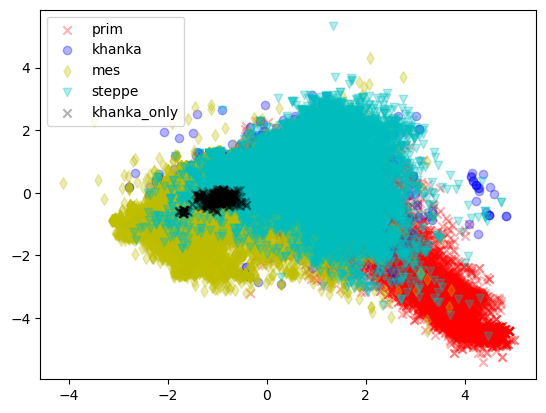

Explained coef ratio (LDA) for prim_khanka_mes_steppe_khanka_only: [0.57932857 0.303745 ]

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.04945826014053271
ai_v3_yr = 0.042903834859720276
wc2.1_30s_bio_16 = 0.04223427005742911
current_30arcsec_aridityIndexThornthwaite = 0.04111177378073872
wc2.1_30s_bio_13 = 0.03664878553987416
wc2.1_30s_bio_4 = 0.03346602922573476
wc2.1_30s_bio_12 = 0.030982495266806805
current_30arcsec_minTempWarmest = 0.028321509456928573
current_30arcsec_continentality = 0.028066799489734603
current_30arcsec_embergerQ = 0.027263514880359455
wc2.1_30s_bio_8 = 0.027263413918395506
wc2.1_30s_bio_3 = 0.022971081873069094
wc2.1_30s_elev = 0.022738418491635208
wc2.1_30s_bio_15 = 0.02184736364548097
wc2.1_30s_bio_10 = 0.02165195732030758
wc2.1_30s_bio_19 = 0.02135563505729735
current_30arcsec_climaticMoistureIndex = 0.02112886137248046
wc2.1_30s_bio_1 = 0.020400950720486026
current_30arcsec_annualPET = 0.019699364112830877
current_30arcsec_topoWet = 0.01876518902919979
current_30arcsec_tri = 0.01833072908974956
wc2.1_30s_bio_7 = 0.018319278113883432
current_30arcsec_PETWettestQuarter = 

Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr_sd', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5'

Balanced accuracy estimation for the best feature subset:

[0.37810414 0.50125374 0.51816765 0.4780554  0.40573407]


Balanced accuracy estimation for all features in the experiment:

[0.41205223 0.50837677 0.51798906 0.47553533 0.42088465]


Descriptive measures for: prim

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,...,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000
mean,2.156044,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033,2.430627,2.314912,...,2.713426,86.608376,-81.737492,9722.821287,14239.750079,120.279105,26.345519,0.089008,31.701062,616.672479
std,9.868442,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443,1.983601,2.014461,...,1.909574,36.961602,102.278737,8487.374556,11050.198463,98.436222,12.077058,0.479230,23.250429,160.437656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.470000,8.950000,-0.980000,0.000000,87.470000
25%,0.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,59.000000,-157.000000,3858.000000,6703.500000,31.230000,15.750000,-0.350000,9.250000,506.660000
50%,0.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750,1.000000,1.000000,...,3.000000,84.000000,-47.000000,8977.500000,11052.000000,83.995000,19.650000,0.080000,33.500000,621.030030
75%,0.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510,3.000000,3.000000,...,4.000000,113.000000,-4.000000,11286.000000,17399.250000,204.530000,37.250000,0.570000,50.440000,704.770020
max,100.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250,7.000000,7.000000,...,12.000000,257.000000,204.000000,97884.000000,97884.000000,497.149990,61.850000,0.930000,98.430000,1606.500000


Descriptive measures for: khanka

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,...,28497.000000,28497.00000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000
mean,3.677077,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995,2.240422,2.119757,...,4.041197,127.90213,-127.684598,14367.191441,17883.414465,41.162809,36.929938,-0.318499,45.865979,737.155262
std,12.896483,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013,1.918512,1.939528,...,1.532055,38.64542,85.453659,10644.120183,12074.414143,28.767024,7.417619,0.234523,13.836899,152.082122
min,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-36.00000,-461.000000,0.000000,144.000000,1.090000,0.850000,-0.990000,0.000000,160.270000
25%,0.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840,1.000000,1.000000,...,3.000000,107.00000,-184.000000,9487.500000,11187.000000,25.420000,32.600000,-0.490000,37.090000,660.510010
50%,0.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240,1.000000,1.000000,...,3.000000,122.00000,-145.000000,10560.000000,15067.500000,34.380000,37.750000,-0.360000,46.680000,702.890010
75%,0.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500,3.000000,2.000000,...,5.000000,150.00000,-86.000000,16353.000000,19551.000000,46.870000,42.000000,-0.210000,54.900000,766.479980
max,100.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380,7.000000,7.000000,...,12.000000,262.00000,291.000000,117000.000000,117000.000000,1074.280030,61.850000,0.830000,98.750000,1676.699950


Descriptive measures for: mes

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,51823.00000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,...,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000
mean,2.69050,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069,1.777936,1.583100,...,5.414407,164.123141,-51.908603,24904.444780,30872.003956,92.128794,31.480094,-0.013119,30.541438,834.901960
std,10.42965,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783,1.446461,1.429845,...,1.914021,45.825804,102.707696,17197.471991,19241.919866,70.941631,8.114526,0.339614,18.699014,181.043890
min,0.00000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.090000,0.850000,-0.990000,0.000000,114.870000
25%,0.00000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870,1.000000,1.000000,...,4.000000,128.000000,-134.000000,10935.000000,16044.000000,37.220000,25.450000,-0.310000,17.630000,691.705015
50%,0.00000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840,1.000000,1.000000,...,5.000000,168.000000,-30.000000,21000.000000,24180.000000,67.510000,30.000000,0.010000,29.490000,820.565005
75%,0.00000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750,2.000000,2.000000,...,7.000000,202.000000,26.000000,32460.000000,40995.000000,130.710010,37.000000,0.280000,44.610000,986.652508
max,100.00000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000,7.000000,7.000000,...,12.000000,290.000000,297.000000,111870.000000,111870.000000,1297.910030,61.850000,0.930000,98.750000,1768.859990


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000,sq1,sq2,sq3,sq4,sq5,sq6,sq7,et0_v3_yr_sd,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34545.000000,...,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000
mean,8.250131,16.554474,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,52.024663,...,4.654952,111.269777,-83.104377,14470.484288,19549.328014,1487.456997,244.137528,1.753728,50.857873,732.592413
std,17.445077,21.934457,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,16.559986,...,5.247746,45.523186,107.672137,11468.350876,13136.352776,6781.602667,2876.590529,10.363864,18.121296,244.573596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-95.000000,-469.000000,-374.000000,-15.000000,1.090000,0.850000,-0.990000,-0.980000,-0.340000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,...,3.000000,94.000000,-172.000000,9075.000000,10752.000000,24.420000,25.400000,-0.550000,43.930000,659.010010
50%,0.761650,5.581600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.000000,...,4.000000,116.000000,-106.000000,10635.000000,15624.000000,33.150000,35.800000,-0.450000,53.270000,723.390010
75%,8.007510,26.700920,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,61.000000,...,5.000000,134.000000,6.000000,20128.500000,24937.500000,47.770000,41.050000,-0.270000,61.960000,854.140010
max,100.000000,97.152360,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,112.000000,...,150.700000,263.000000,235.000000,103032.000000,103032.000000,92394.000000,64638.000000,199.000000,98.750000,1574.810060


Descriptive measures for: khanka_only

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.447062,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515,1.575385,1.447692,...,5.0,163.166154,-92.281538,20913.339231,20974.622308,47.993369,35.422385,-0.258000,35.458523,809.812706
std,2.711455,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955,0.696465,0.497639,...,0.0,5.429767,7.501975,954.553928,494.935241,2.777164,0.813150,0.041686,3.331143,19.536155
min,0.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000,1.000000,1.000000,...,5.0,138.000000,-118.000000,11580.000000,18112.500000,42.120000,34.600000,-0.330000,28.240000,758.880000
25%,0.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000,1.000000,1.000000,...,5.0,160.000000,-97.000000,20842.500000,20842.500000,46.292500,34.850000,-0.290000,32.930000,797.570010
50%,0.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210,1.000000,1.000000,...,5.0,164.000000,-89.000000,21189.000000,21189.000000,48.350000,35.050000,-0.260000,34.480000,812.869995
75%,0.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370,2.000000,2.000000,...,5.0,167.000000,-86.000000,21262.500000,21262.500000,50.190000,35.687500,-0.230000,38.340000,824.609990
max,16.976400,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100,3.000000,2.000000,...,5.0,173.000000,-85.000000,21556.500000,21556.500000,53.930000,37.550000,-0.150000,41.670000,860.049990


Pair analysis. Feature set name: all_features

Datasets to compare: prim, khanka

Feature importances of all considered features:

current_30arcsec_continentality = 0.07745511464985871
wc2.1_30s_bio_4 = 0.07356156597987644
wc2.1_30s_bio_7 = 0.060386108896542584
wc2.1_30s_bio_8 = 0.05209061018586007
wc2.1_30s_bio_19 = 0.050991766108105685
wc2.1_30s_bio_14 = 0.04807365627208257
wc2.1_30s_bio_17 = 0.04030087895379042
wc2.1_30s_bio_15 = 0.03574104211521403
current_30arcsec_embergerQ = 0.030080281498867243
wc2.1_30s_bio_9 = 0.029933507028566567
current_30arcsec_PETWettestQuarter = 0.02494903707851799
current_30arcsec_annualPET = 0.023421158753887443
wc2.1_30s_bio_12 = 0.022678346771878667
current_30arcsec_climaticMoistureIndex = 0.020961866248016915
wc2.1_30s_bio_10 = 0.01984795344511038
ai_v3_yr = 0.016723527811451745
current_30arcsec_PETseasonality = 0.016529068909161105
current_30arcsec_PETWarmestQuarter = 0.01592637279048271
current_30arcsec_growingDegDays0 = 0.015378859842991931
current_30arcsec_growingDegDays5 = 0.01508329651464146
et0_v3_yr = 0.014649923018538118
current_30arcsec_thermicityIndex = 0.014355959970

Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr_sd', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5'

Balanced accuracy estimation for the best feature subset:

[0.58269597 0.85591411 0.87887424 0.76437779 0.63422249]


Balanced accuracy estimation for all features in the experiment:

[0.58312797 0.85927148 0.87682579 0.76455591 0.63953458]


Descriptive measures for: prim

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,...,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000
mean,2.156044,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033,2.430627,2.314912,...,2.713426,86.608376,-81.737492,9722.821287,14239.750079,120.279105,26.345519,0.089008,31.701062,616.672479
std,9.868442,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443,1.983601,2.014461,...,1.909574,36.961602,102.278737,8487.374556,11050.198463,98.436222,12.077058,0.479230,23.250429,160.437656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.470000,8.950000,-0.980000,0.000000,87.470000
25%,0.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,59.000000,-157.000000,3858.000000,6703.500000,31.230000,15.750000,-0.350000,9.250000,506.660000
50%,0.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750,1.000000,1.000000,...,3.000000,84.000000,-47.000000,8977.500000,11052.000000,83.995000,19.650000,0.080000,33.500000,621.030030
75%,0.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510,3.000000,3.000000,...,4.000000,113.000000,-4.000000,11286.000000,17399.250000,204.530000,37.250000,0.570000,50.440000,704.770020
max,100.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250,7.000000,7.000000,...,12.000000,257.000000,204.000000,97884.000000,97884.000000,497.149990,61.850000,0.930000,98.430000,1606.500000


Descriptive measures for: khanka

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,...,28497.000000,28497.00000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000
mean,3.677077,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995,2.240422,2.119757,...,4.041197,127.90213,-127.684598,14367.191441,17883.414465,41.162809,36.929938,-0.318499,45.865979,737.155262
std,12.896483,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013,1.918512,1.939528,...,1.532055,38.64542,85.453659,10644.120183,12074.414143,28.767024,7.417619,0.234523,13.836899,152.082122
min,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-36.00000,-461.000000,0.000000,144.000000,1.090000,0.850000,-0.990000,0.000000,160.270000
25%,0.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840,1.000000,1.000000,...,3.000000,107.00000,-184.000000,9487.500000,11187.000000,25.420000,32.600000,-0.490000,37.090000,660.510010
50%,0.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240,1.000000,1.000000,...,3.000000,122.00000,-145.000000,10560.000000,15067.500000,34.380000,37.750000,-0.360000,46.680000,702.890010
75%,0.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500,3.000000,2.000000,...,5.000000,150.00000,-86.000000,16353.000000,19551.000000,46.870000,42.000000,-0.210000,54.900000,766.479980
max,100.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380,7.000000,7.000000,...,12.000000,262.00000,291.000000,117000.000000,117000.000000,1074.280030,61.850000,0.830000,98.750000,1676.699950


Datasets to compare: prim, mes

Feature importances of all considered features:

wc2.1_30s_bio_4 = 0.06453869454177048
wc2.1_30s_bio_8 = 0.06029001913471306
current_30arcsec_minTempWarmest = 0.05900898659956378
wc2.1_30s_bio_5 = 0.05060696882751961
current_30arcsec_PETWettestQuarter = 0.04555308251814937
wc2.1_30s_bio_10 = 0.043916336975376835
current_30arcsec_continentality = 0.04256954104388325
wc2.1_30s_bio_7 = 0.03366399621974362
wc2.1_30s_bio_15 = 0.032637826588143494
wc2.1_30s_elev = 0.029664816831622507
current_30arcsec_growingDegDays5 = 0.027201669753417777
wc2.1_30s_bio_19 = 0.024706892549234506
current_30arcsec_thermicityIndex = 0.023270387888254102
current_30arcsec_annualPET = 0.022325508913252422
current_30arcsec_monthCountByTemp10 = 0.021875559017286016
wc2.1_30s_bio_3 = 0.021197785495491422
wc2.1_30s_bio_18 = 0.019750000669908774
wc2.1_30s_bio_16 = 0.018150982240034978
wc2.1_30s_bio_9 = 0.01787094724237027
current_30arcsec_PETWarmestQuarter = 0.017760085784081482
wc2.1_30s_bio_13 = 0.016517348389003986
current_30arcsec_growingDegDays0 = 0.016332287616

Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr_sd', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5'

Balanced accuracy estimation for the best feature subset:

[0.61826905 0.87331734 0.96191611 0.76049687 0.67332396]


Balanced accuracy estimation for all features in the experiment:

[0.60853137 0.87905681 0.96487223 0.75984003 0.67370414]


Descriptive measures for: prim

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,...,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000
mean,2.156044,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033,2.430627,2.314912,...,2.713426,86.608376,-81.737492,9722.821287,14239.750079,120.279105,26.345519,0.089008,31.701062,616.672479
std,9.868442,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443,1.983601,2.014461,...,1.909574,36.961602,102.278737,8487.374556,11050.198463,98.436222,12.077058,0.479230,23.250429,160.437656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.470000,8.950000,-0.980000,0.000000,87.470000
25%,0.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,59.000000,-157.000000,3858.000000,6703.500000,31.230000,15.750000,-0.350000,9.250000,506.660000
50%,0.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750,1.000000,1.000000,...,3.000000,84.000000,-47.000000,8977.500000,11052.000000,83.995000,19.650000,0.080000,33.500000,621.030030
75%,0.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510,3.000000,3.000000,...,4.000000,113.000000,-4.000000,11286.000000,17399.250000,204.530000,37.250000,0.570000,50.440000,704.770020
max,100.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250,7.000000,7.000000,...,12.000000,257.000000,204.000000,97884.000000,97884.000000,497.149990,61.850000,0.930000,98.430000,1606.500000


Descriptive measures for: mes

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,51823.00000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,...,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000
mean,2.69050,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069,1.777936,1.583100,...,5.414407,164.123141,-51.908603,24904.444780,30872.003956,92.128794,31.480094,-0.013119,30.541438,834.901960
std,10.42965,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783,1.446461,1.429845,...,1.914021,45.825804,102.707696,17197.471991,19241.919866,70.941631,8.114526,0.339614,18.699014,181.043890
min,0.00000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.090000,0.850000,-0.990000,0.000000,114.870000
25%,0.00000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870,1.000000,1.000000,...,4.000000,128.000000,-134.000000,10935.000000,16044.000000,37.220000,25.450000,-0.310000,17.630000,691.705015
50%,0.00000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840,1.000000,1.000000,...,5.000000,168.000000,-30.000000,21000.000000,24180.000000,67.510000,30.000000,0.010000,29.490000,820.565005
75%,0.00000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750,2.000000,2.000000,...,7.000000,202.000000,26.000000,32460.000000,40995.000000,130.710010,37.000000,0.280000,44.610000,986.652508
max,100.00000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000,7.000000,7.000000,...,12.000000,290.000000,297.000000,111870.000000,111870.000000,1297.910030,61.850000,0.930000,98.750000,1768.859990


Datasets to compare: prim, steppe

Feature importances of all considered features:

wc2.1_30s_bio_17 = 0.05431384378833968
current_30arcsec_climaticMoistureIndex = 0.05060224184451912
current_30arcsec_PETWarmestQuarter = 0.04671827819515153
wc2.1_30s_bio_14 = 0.046108687223196325
ai_v3_yr = 0.042228574339305
current_30arcsec_embergerQ = 0.041633592779646476
current_30arcsec_aridityIndexThornthwaite = 0.03821879052356521
current_30arcsec_PETseasonality = 0.03728415178910924
wc2.1_30s_bio_4 = 0.02969119862155518
current_30arcsec_PETWettestQuarter = 0.02748657193337456
current_30arcsec_continentality = 0.027485500248489458
wc2.1_30s_bio_12 = 0.026687632012548715
current_30arcsec_annualPET = 0.02335346496777773
wc2.1_30s_bio_15 = 0.0232840414518861
wc2.1_30s_bio_19 = 0.02324716054353921
wc2.1_30s_bio_8 = 0.0219503959333336
wc2.1_30s_bio_7 = 0.020727021386970544
et0_v3_yr = 0.019883968649644437
current_30arcsec_topoWet = 0.017897248152161243
current_30arcsec_growingDegDays5 = 0.01772679380967934
wc2.1_30s_bio_2 = 0.017546173774332673
wc2.1_30s_bio_16 = 0.017503906410206663

Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr_sd', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5'

Balanced accuracy estimation for the best feature subset:

[0.54939525 0.85547247 0.9131972  0.69828992 0.60602775]


Balanced accuracy estimation for all features in the experiment:

[0.54506605 0.85441629 0.91053926 0.69774432 0.60349857]


Descriptive measures for: prim

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,...,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000
mean,2.156044,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033,2.430627,2.314912,...,2.713426,86.608376,-81.737492,9722.821287,14239.750079,120.279105,26.345519,0.089008,31.701062,616.672479
std,9.868442,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443,1.983601,2.014461,...,1.909574,36.961602,102.278737,8487.374556,11050.198463,98.436222,12.077058,0.479230,23.250429,160.437656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.470000,8.950000,-0.980000,0.000000,87.470000
25%,0.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,59.000000,-157.000000,3858.000000,6703.500000,31.230000,15.750000,-0.350000,9.250000,506.660000
50%,0.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750,1.000000,1.000000,...,3.000000,84.000000,-47.000000,8977.500000,11052.000000,83.995000,19.650000,0.080000,33.500000,621.030030
75%,0.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510,3.000000,3.000000,...,4.000000,113.000000,-4.000000,11286.000000,17399.250000,204.530000,37.250000,0.570000,50.440000,704.770020
max,100.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250,7.000000,7.000000,...,12.000000,257.000000,204.000000,97884.000000,97884.000000,497.149990,61.850000,0.930000,98.430000,1606.500000


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000,sq1,sq2,sq3,sq4,sq5,sq6,sq7,et0_v3_yr_sd,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34545.000000,...,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000
mean,8.250131,16.554474,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,52.024663,...,4.654952,111.269777,-83.104377,14470.484288,19549.328014,1487.456997,244.137528,1.753728,50.857873,732.592413
std,17.445077,21.934457,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,16.559986,...,5.247746,45.523186,107.672137,11468.350876,13136.352776,6781.602667,2876.590529,10.363864,18.121296,244.573596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-95.000000,-469.000000,-374.000000,-15.000000,1.090000,0.850000,-0.990000,-0.980000,-0.340000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,...,3.000000,94.000000,-172.000000,9075.000000,10752.000000,24.420000,25.400000,-0.550000,43.930000,659.010010
50%,0.761650,5.581600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.000000,...,4.000000,116.000000,-106.000000,10635.000000,15624.000000,33.150000,35.800000,-0.450000,53.270000,723.390010
75%,8.007510,26.700920,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,61.000000,...,5.000000,134.000000,6.000000,20128.500000,24937.500000,47.770000,41.050000,-0.270000,61.960000,854.140010
max,100.000000,97.152360,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,112.000000,...,150.700000,263.000000,235.000000,103032.000000,103032.000000,92394.000000,64638.000000,199.000000,98.750000,1574.810060


Datasets to compare: prim, khanka_only

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.08927879293257993
wc2.1_30s_bio_10 = 0.08795530852989275
current_30arcsec_minTempWarmest = 0.08381125840274066
wc2.1_30s_bio_9 = 0.04866895827769464
wc2.1_30s_bio_11 = 0.04383302077283772
current_30arcsec_growingDegDays0 = 0.043096647528559705
current_30arcsec_PETDriestQuarter = 0.039588610987305456
current_30arcsec_growingDegDays5 = 0.03840990171922625
wc2.1_30s_bio_4 = 0.03462141254714162
wc2.1_30s_elev = 0.03192455163402483
current_30arcsec_thermicityIndex = 0.030525220654672072
wc2.1_30s_bio_18 = 0.02896961951930586
wc2.1_30s_bio_5 = 0.02871359836095308
wc2.1_30s_bio_6 = 0.027385909089575305
current_30arcsec_annualPET = 0.02528335256002633
current_30arcsec_aridityIndexThornthwaite = 0.023890771467262418
current_30arcsec_continentality = 0.022136065576519693
wc2.1_30s_bio_3 = 0.02133718011612426
wc2.1_30s_bio_15 = 0.02033347015710598
wc2.1_30s_bio_7 = 0.020323648484014765
et0_v3_yr = 0.019293490900097833
current_30arcsec_maxTempColdest = 0.01926549626287132
curre

Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr_sd', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5'

Balanced accuracy estimation for the best feature subset:

[1.         1.         1.         1.         0.99171127]


Balanced accuracy estimation for all features in the experiment:

[1.         1.         1.         1.         0.99171127]


Descriptive measures for: prim

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,...,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000
mean,2.156044,1.567077,7.243522,38.911515,40.548059,7.692570,0.867463,8.560033,2.430627,2.314912,...,2.713426,86.608376,-81.737492,9722.821287,14239.750079,120.279105,26.345519,0.089008,31.701062,616.672479
std,9.868442,6.511707,16.896344,25.912663,31.148621,13.926796,4.568112,14.971443,1.983601,2.014461,...,1.909574,36.961602,102.278737,8487.374556,11050.198463,98.436222,12.077058,0.479230,23.250429,160.437656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.470000,8.950000,-0.980000,0.000000,87.470000
25%,0.000000,0.044400,0.000000,17.538580,9.240020,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,59.000000,-157.000000,3858.000000,6703.500000,31.230000,15.750000,-0.350000,9.250000,506.660000
50%,0.000000,0.214300,0.000000,34.120770,38.995510,0.244990,0.000000,0.840750,1.000000,1.000000,...,3.000000,84.000000,-47.000000,8977.500000,11052.000000,83.995000,19.650000,0.080000,33.500000,621.030030
75%,0.000000,0.603500,5.000000,59.362420,68.054400,8.813680,0.042610,10.096510,3.000000,3.000000,...,4.000000,113.000000,-4.000000,11286.000000,17399.250000,204.530000,37.250000,0.570000,50.440000,704.770020
max,100.000000,100.000000,100.000000,100.000000,99.949000,83.728430,89.116550,95.891250,7.000000,7.000000,...,12.000000,257.000000,204.000000,97884.000000,97884.000000,497.149990,61.850000,0.930000,98.430000,1606.500000


Descriptive measures for: khanka_only

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.447062,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515,1.575385,1.447692,...,5.0,163.166154,-92.281538,20913.339231,20974.622308,47.993369,35.422385,-0.258000,35.458523,809.812706
std,2.711455,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955,0.696465,0.497639,...,0.0,5.429767,7.501975,954.553928,494.935241,2.777164,0.813150,0.041686,3.331143,19.536155
min,0.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000,1.000000,1.000000,...,5.0,138.000000,-118.000000,11580.000000,18112.500000,42.120000,34.600000,-0.330000,28.240000,758.880000
25%,0.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000,1.000000,1.000000,...,5.0,160.000000,-97.000000,20842.500000,20842.500000,46.292500,34.850000,-0.290000,32.930000,797.570010
50%,0.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210,1.000000,1.000000,...,5.0,164.000000,-89.000000,21189.000000,21189.000000,48.350000,35.050000,-0.260000,34.480000,812.869995
75%,0.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370,2.000000,2.000000,...,5.0,167.000000,-86.000000,21262.500000,21262.500000,50.190000,35.687500,-0.230000,38.340000,824.609990
max,16.976400,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100,3.000000,2.000000,...,5.0,173.000000,-85.000000,21556.500000,21556.500000,53.930000,37.550000,-0.150000,41.670000,860.049990


Datasets to compare: khanka, mes

Feature importances of all considered features:

current_30arcsec_embergerQ = 0.04873001047449701
ai_v3_yr = 0.047981867579888836
wc2.1_30s_bio_18 = 0.045879954956156155
current_30arcsec_aridityIndexThornthwaite = 0.0455003126258186
wc2.1_30s_bio_12 = 0.04514587019253717
wc2.1_30s_bio_16 = 0.04314900484146948
wc2.1_30s_bio_11 = 0.03444522969644499
wc2.1_30s_bio_17 = 0.02805347457975884
wc2.1_30s_bio_1 = 0.02802795811675934
wc2.1_30s_elev = 0.024082949728396804
current_30arcsec_climaticMoistureIndex = 0.023719861191870556
current_30arcsec_tri = 0.02104304871914383
current_30arcsec_PETseasonality = 0.02087088212841475
current_30arcsec_topoWet = 0.020243018455497523
wc2.1_30s_bio_2 = 0.02000670174173643
wc2.1_30s_bio_15 = 0.019671776288579898
wc2.1_30s_bio_3 = 0.019669323562760684
current_30arcsec_growingDegDays0 = 0.019596506814324354
wc2.1_30s_bio_4 = 0.019078019978848334
wc2.1_30s_bio_13 = 0.018420402771895224
current_30arcsec_maxTempColdest = 0.01776467173981323
wc2.1_30s_bio_6 = 0.017695470087671795
current_30arcsec_annualPET = 0.0

Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr_sd', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5'

Balanced accuracy estimation for the best feature subset:

[0.66142673 0.70844379 0.61157753 0.71490189 0.65735955]


Balanced accuracy estimation for all features in the experiment:

[0.66378983 0.71118789 0.61087866 0.72045996 0.65807309]


Descriptive measures for: khanka

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,...,28497.000000,28497.00000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000
mean,3.677077,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995,2.240422,2.119757,...,4.041197,127.90213,-127.684598,14367.191441,17883.414465,41.162809,36.929938,-0.318499,45.865979,737.155262
std,12.896483,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013,1.918512,1.939528,...,1.532055,38.64542,85.453659,10644.120183,12074.414143,28.767024,7.417619,0.234523,13.836899,152.082122
min,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-36.00000,-461.000000,0.000000,144.000000,1.090000,0.850000,-0.990000,0.000000,160.270000
25%,0.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840,1.000000,1.000000,...,3.000000,107.00000,-184.000000,9487.500000,11187.000000,25.420000,32.600000,-0.490000,37.090000,660.510010
50%,0.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240,1.000000,1.000000,...,3.000000,122.00000,-145.000000,10560.000000,15067.500000,34.380000,37.750000,-0.360000,46.680000,702.890010
75%,0.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500,3.000000,2.000000,...,5.000000,150.00000,-86.000000,16353.000000,19551.000000,46.870000,42.000000,-0.210000,54.900000,766.479980
max,100.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380,7.000000,7.000000,...,12.000000,262.00000,291.000000,117000.000000,117000.000000,1074.280030,61.850000,0.830000,98.750000,1676.699950


Descriptive measures for: mes

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,51823.00000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,...,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000
mean,2.69050,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069,1.777936,1.583100,...,5.414407,164.123141,-51.908603,24904.444780,30872.003956,92.128794,31.480094,-0.013119,30.541438,834.901960
std,10.42965,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783,1.446461,1.429845,...,1.914021,45.825804,102.707696,17197.471991,19241.919866,70.941631,8.114526,0.339614,18.699014,181.043890
min,0.00000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.090000,0.850000,-0.990000,0.000000,114.870000
25%,0.00000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870,1.000000,1.000000,...,4.000000,128.000000,-134.000000,10935.000000,16044.000000,37.220000,25.450000,-0.310000,17.630000,691.705015
50%,0.00000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840,1.000000,1.000000,...,5.000000,168.000000,-30.000000,21000.000000,24180.000000,67.510000,30.000000,0.010000,29.490000,820.565005
75%,0.00000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750,2.000000,2.000000,...,7.000000,202.000000,26.000000,32460.000000,40995.000000,130.710010,37.000000,0.280000,44.610000,986.652508
max,100.00000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000,7.000000,7.000000,...,12.000000,290.000000,297.000000,111870.000000,111870.000000,1297.910030,61.850000,0.930000,98.750000,1768.859990


Datasets to compare: khanka, steppe

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.047020364620523725
wc2.1_30s_bio_3 = 0.040743943945657564
wc2.1_30s_bio_16 = 0.034848005270806656
current_30arcsec_aridityIndexThornthwaite = 0.033471637927533444
ai_v3_yr = 0.03326015245260177
wc2.1_30s_bio_15 = 0.03278699290517731
wc2.1_30s_bio_4 = 0.03253081866599092
current_30arcsec_continentality = 0.029691132587748064
wc2.1_30s_bio_13 = 0.02552752456546504
et0_v3_yr = 0.02471478539052781
current_30arcsec_annualPET = 0.02426085483146759
wc2.1_30s_elev = 0.023424191120125115
wc2.1_30s_bio_9 = 0.022716346980079977
wc2.1_30s_bio_12 = 0.02124806994741775
current_30arcsec_PETDriestQuarter = 0.02088659679177649
wc2.1_30s_bio_11 = 0.020860423239925326
current_30arcsec_tri = 0.020791170945042035
current_30arcsec_topoWet = 0.020337737555370973
wc2.1_30s_bio_8 = 0.020087971687322237
current_30arcsec_embergerQ = 0.01939868331116811
wc2.1_30s_bio_1 = 0.019246545612499118
FOR_2000 = 0.019103233633959465
wc2.1_30s_bio_2 = 0.018922476880249752
wc2.1_30s_bio_7 = 0.01886067714

Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr_sd', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5'

Balanced accuracy estimation for the best feature subset:

[0.64860165 0.65865043 0.5990956  0.63005841 0.57067533]


Balanced accuracy estimation for all features in the experiment:

[0.64747758 0.66608783 0.59595547 0.60578567 0.57152152]


Descriptive measures for: khanka

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,...,28497.000000,28497.00000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000
mean,3.677077,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995,2.240422,2.119757,...,4.041197,127.90213,-127.684598,14367.191441,17883.414465,41.162809,36.929938,-0.318499,45.865979,737.155262
std,12.896483,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013,1.918512,1.939528,...,1.532055,38.64542,85.453659,10644.120183,12074.414143,28.767024,7.417619,0.234523,13.836899,152.082122
min,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-36.00000,-461.000000,0.000000,144.000000,1.090000,0.850000,-0.990000,0.000000,160.270000
25%,0.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840,1.000000,1.000000,...,3.000000,107.00000,-184.000000,9487.500000,11187.000000,25.420000,32.600000,-0.490000,37.090000,660.510010
50%,0.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240,1.000000,1.000000,...,3.000000,122.00000,-145.000000,10560.000000,15067.500000,34.380000,37.750000,-0.360000,46.680000,702.890010
75%,0.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500,3.000000,2.000000,...,5.000000,150.00000,-86.000000,16353.000000,19551.000000,46.870000,42.000000,-0.210000,54.900000,766.479980
max,100.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380,7.000000,7.000000,...,12.000000,262.00000,291.000000,117000.000000,117000.000000,1074.280030,61.850000,0.830000,98.750000,1676.699950


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000,sq1,sq2,sq3,sq4,sq5,sq6,sq7,et0_v3_yr_sd,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34545.000000,...,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000
mean,8.250131,16.554474,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,52.024663,...,4.654952,111.269777,-83.104377,14470.484288,19549.328014,1487.456997,244.137528,1.753728,50.857873,732.592413
std,17.445077,21.934457,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,16.559986,...,5.247746,45.523186,107.672137,11468.350876,13136.352776,6781.602667,2876.590529,10.363864,18.121296,244.573596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-95.000000,-469.000000,-374.000000,-15.000000,1.090000,0.850000,-0.990000,-0.980000,-0.340000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,...,3.000000,94.000000,-172.000000,9075.000000,10752.000000,24.420000,25.400000,-0.550000,43.930000,659.010010
50%,0.761650,5.581600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.000000,...,4.000000,116.000000,-106.000000,10635.000000,15624.000000,33.150000,35.800000,-0.450000,53.270000,723.390010
75%,8.007510,26.700920,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,61.000000,...,5.000000,134.000000,6.000000,20128.500000,24937.500000,47.770000,41.050000,-0.270000,61.960000,854.140010
max,100.000000,97.152360,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,112.000000,...,150.700000,263.000000,235.000000,103032.000000,103032.000000,92394.000000,64638.000000,199.000000,98.750000,1574.810060


Datasets to compare: khanka, khanka_only

Feature importances of all considered features:

current_30arcsec_PETDriestQuarter = 0.04580891387237213
wc2.1_30s_bio_9 = 0.04443280053551142
wc2.1_30s_bio_4 = 0.044050992099484335
wc2.1_30s_bio_11 = 0.04095811864005024
wc2.1_30s_bio_15 = 0.04014422041275242
current_30arcsec_continentality = 0.039073135485018964
wc2.1_30s_bio_7 = 0.03660568747474089
et0_v3_yr = 0.03239413818161689
current_30arcsec_annualPET = 0.03151998241331779
wc2.1_30s_bio_10 = 0.02934271069363354
current_30arcsec_growingDegDays0 = 0.029328115379626048
current_30arcsec_PETColdestQuarter = 0.028733248841331126
wc2.1_30s_bio_6 = 0.02713656594562808
ai_v3_yr = 0.02672490832218916
wc2.1_30s_bio_3 = 0.02633908914757471
current_30arcsec_maxTempColdest = 0.02619993164261316
current_30arcsec_growingDegDays5 = 0.02566745784997006
wc2.1_30s_elev = 0.025516243292484763
et0_v3_yr_sd = 0.02524361580469838
wc2.1_30s_bio_12 = 0.02324903917497953
wc2.1_30s_bio_18 = 0.022768185354903995
wc2.1_30s_bio_13 = 0.021758339347221968
wc2.1_30s_bio_1 = 0.0213604841646051
current_30arcsec_

Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr_sd', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5'

Balanced accuracy estimation for the best feature subset:

[0.76183854 0.541328   0.57462388 0.75149078 0.70038914]


Balanced accuracy estimation for all features in the experiment:

[0.75056726 0.54508509 0.59716642 0.73637335 0.7154175 ]


Descriptive measures for: khanka

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,28658.000000,...,28497.000000,28497.00000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000,28497.000000
mean,3.677077,4.079943,4.836963,30.358655,38.933948,12.921179,2.802816,15.723995,2.240422,2.119757,...,4.041197,127.90213,-127.684598,14367.191441,17883.414465,41.162809,36.929938,-0.318499,45.865979,737.155262
std,12.896483,11.778941,12.094958,22.411631,33.395956,17.426220,9.377041,19.867013,1.918512,1.939528,...,1.532055,38.64542,85.453659,10644.120183,12074.414143,28.767024,7.417619,0.234523,13.836899,152.082122
min,0.000000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-36.00000,-461.000000,0.000000,144.000000,1.090000,0.850000,-0.990000,0.000000,160.270000
25%,0.000000,0.065325,0.000000,11.304080,5.817570,0.000000,0.000000,0.037840,1.000000,1.000000,...,3.000000,107.00000,-184.000000,9487.500000,11187.000000,25.420000,32.600000,-0.490000,37.090000,660.510010
50%,0.000000,0.350000,0.000000,25.976980,33.204280,4.603560,0.000000,6.284240,1.000000,1.000000,...,3.000000,122.00000,-145.000000,10560.000000,15067.500000,34.380000,37.750000,-0.360000,46.680000,702.890010
75%,0.000000,1.270600,4.000000,43.989210,70.398325,20.081110,0.593440,25.028500,3.000000,2.000000,...,5.000000,150.00000,-86.000000,16353.000000,19551.000000,46.870000,42.000000,-0.210000,54.900000,766.479980
max,100.000000,100.000000,100.000000,99.985900,100.000000,96.891160,99.466380,99.466380,7.000000,7.000000,...,12.000000,262.00000,291.000000,117000.000000,117000.000000,1074.280030,61.850000,0.830000,98.750000,1676.699950


Descriptive measures for: khanka_only

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.447062,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515,1.575385,1.447692,...,5.0,163.166154,-92.281538,20913.339231,20974.622308,47.993369,35.422385,-0.258000,35.458523,809.812706
std,2.711455,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955,0.696465,0.497639,...,0.0,5.429767,7.501975,954.553928,494.935241,2.777164,0.813150,0.041686,3.331143,19.536155
min,0.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000,1.000000,1.000000,...,5.0,138.000000,-118.000000,11580.000000,18112.500000,42.120000,34.600000,-0.330000,28.240000,758.880000
25%,0.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000,1.000000,1.000000,...,5.0,160.000000,-97.000000,20842.500000,20842.500000,46.292500,34.850000,-0.290000,32.930000,797.570010
50%,0.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210,1.000000,1.000000,...,5.0,164.000000,-89.000000,21189.000000,21189.000000,48.350000,35.050000,-0.260000,34.480000,812.869995
75%,0.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370,2.000000,2.000000,...,5.0,167.000000,-86.000000,21262.500000,21262.500000,50.190000,35.687500,-0.230000,38.340000,824.609990
max,16.976400,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100,3.000000,2.000000,...,5.0,173.000000,-85.000000,21556.500000,21556.500000,53.930000,37.550000,-0.150000,41.670000,860.049990


Datasets to compare: mes, steppe

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.0861951446030379
current_30arcsec_aridityIndexThornthwaite = 0.058778332311278006
wc2.1_30s_bio_13 = 0.05678265665944253
ai_v3_yr = 0.05492541390705207
current_30arcsec_climaticMoistureIndex = 0.05043519816001053
wc2.1_30s_bio_12 = 0.04673216623654547
wc2.1_30s_bio_16 = 0.037313809720079465
current_30arcsec_minTempWarmest = 0.03323745882919987
et0_v3_yr_sd = 0.031508795708411766
wc2.1_30s_bio_3 = 0.02715684412178893
wc2.1_30s_elev = 0.026313842318100158
wc2.1_30s_bio_8 = 0.025071273370522607
current_30arcsec_embergerQ = 0.021953171361738962
NVG_2000 = 0.019603719335807186
current_30arcsec_PETseasonality = 0.01762363008030097
current_30arcsec_continentality = 0.017037000854571153
wc2.1_30s_bio_4 = 0.016616380600829553
wc2.1_30s_bio_15 = 0.016089336072134034
et0_v3_yr = 0.015205160023946215
current_30arcsec_PETDriestQuarter = 0.014997416202893655
current_30arcsec_annualPET = 0.01479604892228248
wc2.1_30s_bio_2 = 0.014250330446824399
current_30arcsec_topoWet = 0.01383

Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr_sd', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5'

Balanced accuracy estimation for the best feature subset:

[0.7712042  0.85227388 0.80039711 0.70993934 0.77174704]


Balanced accuracy estimation for all features in the experiment:

[0.77330925 0.85487117 0.80047562 0.70884815 0.7733073 ]


Descriptive measures for: mes

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,51823.00000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,...,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000
mean,2.69050,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069,1.777936,1.583100,...,5.414407,164.123141,-51.908603,24904.444780,30872.003956,92.128794,31.480094,-0.013119,30.541438,834.901960
std,10.42965,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783,1.446461,1.429845,...,1.914021,45.825804,102.707696,17197.471991,19241.919866,70.941631,8.114526,0.339614,18.699014,181.043890
min,0.00000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.090000,0.850000,-0.990000,0.000000,114.870000
25%,0.00000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870,1.000000,1.000000,...,4.000000,128.000000,-134.000000,10935.000000,16044.000000,37.220000,25.450000,-0.310000,17.630000,691.705015
50%,0.00000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840,1.000000,1.000000,...,5.000000,168.000000,-30.000000,21000.000000,24180.000000,67.510000,30.000000,0.010000,29.490000,820.565005
75%,0.00000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750,2.000000,2.000000,...,7.000000,202.000000,26.000000,32460.000000,40995.000000,130.710010,37.000000,0.280000,44.610000,986.652508
max,100.00000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000,7.000000,7.000000,...,12.000000,290.000000,297.000000,111870.000000,111870.000000,1297.910030,61.850000,0.930000,98.750000,1768.859990


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000,sq1,sq2,sq3,sq4,sq5,sq6,sq7,et0_v3_yr_sd,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34545.000000,...,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000
mean,8.250131,16.554474,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,52.024663,...,4.654952,111.269777,-83.104377,14470.484288,19549.328014,1487.456997,244.137528,1.753728,50.857873,732.592413
std,17.445077,21.934457,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,16.559986,...,5.247746,45.523186,107.672137,11468.350876,13136.352776,6781.602667,2876.590529,10.363864,18.121296,244.573596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-95.000000,-469.000000,-374.000000,-15.000000,1.090000,0.850000,-0.990000,-0.980000,-0.340000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,...,3.000000,94.000000,-172.000000,9075.000000,10752.000000,24.420000,25.400000,-0.550000,43.930000,659.010010
50%,0.761650,5.581600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.000000,...,4.000000,116.000000,-106.000000,10635.000000,15624.000000,33.150000,35.800000,-0.450000,53.270000,723.390010
75%,8.007510,26.700920,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,61.000000,...,5.000000,134.000000,6.000000,20128.500000,24937.500000,47.770000,41.050000,-0.270000,61.960000,854.140010
max,100.000000,97.152360,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,112.000000,...,150.700000,263.000000,235.000000,103032.000000,103032.000000,92394.000000,64638.000000,199.000000,98.750000,1574.810060


Datasets to compare: mes, khanka_only

Feature importances of all considered features:

et0_v3_yr = 0.051155355398911244
current_30arcsec_annualPET = 0.04781854091807114
wc2.1_30s_bio_1 = 0.04726398778672965
current_30arcsec_growingDegDays0 = 0.04397363585930385
et0_v3_yr_sd = 0.03449636216875564
wc2.1_30s_bio_16 = 0.033370353862781435
wc2.1_30s_bio_4 = 0.0331802438321946
wc2.1_30s_bio_11 = 0.031814464913596185
wc2.1_30s_bio_15 = 0.031746440356610804
ai_v3_yr = 0.03166459785217182
current_30arcsec_PETColdestQuarter = 0.03137230781532099
wc2.1_30s_bio_7 = 0.03096514030296089
current_30arcsec_continentality = 0.02896904853288408
wc2.1_30s_bio_9 = 0.027244928558454867
wc2.1_30s_bio_13 = 0.02702858954900459
current_30arcsec_embergerQ = 0.026546014056368722
wc2.1_30s_bio_10 = 0.026530764136906707
current_30arcsec_growingDegDays5 = 0.0258123561062354
wc2.1_30s_elev = 0.022764199130045695
wc2.1_30s_bio_18 = 0.020259334213853116
wc2.1_30s_bio_12 = 0.02004864668062294
wc2.1_30s_bio_3 = 0.018992964542890955
current_30arcsec_thermicityIndex = 0.018633733067735473
current_30arcsec_ma

Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr_sd', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5'

Balanced accuracy estimation for the best feature subset:

[0.82105431 0.79340517 0.816015   0.82931695 0.83571258]


Balanced accuracy estimation for all features in the experiment:

[0.84808111 0.79740691 0.82770906 0.81003431 0.81273939]


Descriptive measures for: mes

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,51823.00000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,51823.000000,...,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000,50308.000000
mean,2.69050,7.036051,1.495504,20.287236,44.847976,10.247348,5.098721,15.346069,1.777936,1.583100,...,5.414407,164.123141,-51.908603,24904.444780,30872.003956,92.128794,31.480094,-0.013119,30.541438,834.901960
std,10.42965,15.906968,7.346110,18.107499,34.217711,14.140200,11.368037,18.300783,1.446461,1.429845,...,1.914021,45.825804,102.707696,17197.471991,19241.919866,70.941631,8.114526,0.339614,18.699014,181.043890
min,0.00000,0.000000,0.000000,0.000000,-0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-461.000000,0.000000,0.000000,1.090000,0.850000,-0.990000,0.000000,114.870000
25%,0.00000,0.130300,0.000000,6.437500,9.398915,0.032940,0.000000,0.560870,1.000000,1.000000,...,4.000000,128.000000,-134.000000,10935.000000,16044.000000,37.220000,25.450000,-0.310000,17.630000,691.705015
50%,0.00000,0.751400,0.000000,15.904510,43.695030,3.921100,0.000000,7.205840,1.000000,1.000000,...,5.000000,168.000000,-30.000000,21000.000000,24180.000000,67.510000,30.000000,0.010000,29.490000,820.565005
75%,0.00000,5.320100,0.000000,28.907310,77.955310,15.277520,3.136265,25.038750,2.000000,2.000000,...,7.000000,202.000000,26.000000,32460.000000,40995.000000,130.710010,37.000000,0.280000,44.610000,986.652508
max,100.00000,100.000000,100.000000,100.000000,99.993600,94.018750,100.000000,100.000000,7.000000,7.000000,...,12.000000,290.000000,297.000000,111870.000000,111870.000000,1297.910030,61.850000,0.930000,98.750000,1768.859990


Descriptive measures for: khanka_only

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.447062,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515,1.575385,1.447692,...,5.0,163.166154,-92.281538,20913.339231,20974.622308,47.993369,35.422385,-0.258000,35.458523,809.812706
std,2.711455,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955,0.696465,0.497639,...,0.0,5.429767,7.501975,954.553928,494.935241,2.777164,0.813150,0.041686,3.331143,19.536155
min,0.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000,1.000000,1.000000,...,5.0,138.000000,-118.000000,11580.000000,18112.500000,42.120000,34.600000,-0.330000,28.240000,758.880000
25%,0.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000,1.000000,1.000000,...,5.0,160.000000,-97.000000,20842.500000,20842.500000,46.292500,34.850000,-0.290000,32.930000,797.570010
50%,0.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210,1.000000,1.000000,...,5.0,164.000000,-89.000000,21189.000000,21189.000000,48.350000,35.050000,-0.260000,34.480000,812.869995
75%,0.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370,2.000000,2.000000,...,5.0,167.000000,-86.000000,21262.500000,21262.500000,50.190000,35.687500,-0.230000,38.340000,824.609990
max,16.976400,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100,3.000000,2.000000,...,5.0,173.000000,-85.000000,21556.500000,21556.500000,53.930000,37.550000,-0.150000,41.670000,860.049990


Datasets to compare: steppe, khanka_only

Feature importances of all considered features:

current_30arcsec_PETColdestQuarter = 0.06237868267011401
wc2.1_30s_bio_9 = 0.05311259703804043
et0_v3_yr = 0.049193468065021034
wc2.1_30s_bio_13 = 0.04522929938075853
wc2.1_30s_bio_4 = 0.0452081611534175
current_30arcsec_aridityIndexThornthwaite = 0.04411058165451784
wc2.1_30s_bio_1 = 0.04296561440066731
et0_v3_yr_sd = 0.04287840763906219
wc2.1_30s_bio_6 = 0.03922979651051614
wc2.1_30s_bio_11 = 0.037480409992881714
wc2.1_30s_bio_19 = 0.0331348260937489
current_30arcsec_continentality = 0.032940618407050176
wc2.1_30s_bio_15 = 0.03255363358692532
wc2.1_30s_bio_8 = 0.03094739887469736
wc2.1_30s_bio_16 = 0.030728177506039595
wc2.1_30s_bio_7 = 0.030315705668118968
wc2.1_30s_bio_12 = 0.02581648570301408
current_30arcsec_embergerQ = 0.025722444890753052
current_30arcsec_minTempWarmest = 0.024043080703174975
wc2.1_30s_bio_3 = 0.023527264607038783
wc2.1_30s_bio_18 = 0.0216584648067774
current_30arcsec_growingDegDays5 = 0.02136307686401603
wc2.1_30s_bio_10 = 0.017951526399321946
current_30arcsec

Recursive feature elimination procedure, selection the most informative features from

['WAT_2000', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr_sd', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5'

Balanced accuracy estimation for the best feature subset:

[1.         1.         1.         1.         0.99615385]


Balanced accuracy estimation for all features in the experiment:

[1.         1.         1.         1.         0.99615385]


Descriptive measures for: steppe

,NVG_2000,CULTRF_2000,sq1,sq2,sq3,sq4,sq5,sq6,sq7,et0_v3_yr_sd,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34725.000000,34545.000000,...,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000,34433.000000
mean,8.250131,16.554474,2.791045,2.054683,2.101310,1.833837,1.786379,1.734888,2.066379,52.024663,...,4.654952,111.269777,-83.104377,14470.484288,19549.328014,1487.456997,244.137528,1.753728,50.857873,732.592413
std,17.445077,21.934457,6.184876,3.034219,1.836993,1.795527,1.795399,1.783926,1.830431,16.559986,...,5.247746,45.523186,107.672137,11468.350876,13136.352776,6781.602667,2876.590529,10.363864,18.121296,244.573596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-95.000000,-469.000000,-374.000000,-15.000000,1.090000,0.850000,-0.990000,-0.980000,-0.340000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,...,3.000000,94.000000,-172.000000,9075.000000,10752.000000,24.420000,25.400000,-0.550000,43.930000,659.010010
50%,0.761650,5.581600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.000000,...,4.000000,116.000000,-106.000000,10635.000000,15624.000000,33.150000,35.800000,-0.450000,53.270000,723.390010
75%,8.007510,26.700920,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,61.000000,...,5.000000,134.000000,6.000000,20128.500000,24937.500000,47.770000,41.050000,-0.270000,61.960000,854.140010
max,100.000000,97.152360,88.932850,84.764870,7.000000,7.000000,7.000000,7.000000,7.000000,112.000000,...,150.700000,263.000000,235.000000,103032.000000,103032.000000,92394.000000,64638.000000,199.000000,98.750000,1574.810060


Descriptive measures for: khanka_only

,WAT_2000,URB_2000,NVG_2000,GRS_2000,FOR_2000,CULTRF_2000,CULTIR_2000,CULT_2000,sq1,sq2,...,current_30arcsec_monthCountByTemp10,current_30arcsec_minTempWarmest,current_30arcsec_maxTempColdest,current_30arcsec_growingDegDays5,current_30arcsec_growingDegDays0,current_30arcsec_embergerQ,current_30arcsec_continentality,current_30arcsec_climaticMoistureIndex,current_30arcsec_aridityIndexThornthwaite,current_30arcsec_annualPET
count,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.447062,3.152946,0.0,29.056993,53.881483,13.308308,0.153207,13.461515,1.575385,1.447692,...,5.0,163.166154,-92.281538,20913.339231,20974.622308,47.993369,35.422385,-0.258000,35.458523,809.812706
std,2.711455,11.247021,0.0,15.923143,28.444444,13.105389,0.840328,13.238955,0.696465,0.497639,...,0.0,5.429767,7.501975,954.553928,494.935241,2.777164,0.813150,0.041686,3.331143,19.536155
min,0.000000,0.000000,0.0,4.985480,3.950360,0.000000,0.000000,0.000000,1.000000,1.000000,...,5.0,138.000000,-118.000000,11580.000000,18112.500000,42.120000,34.600000,-0.330000,28.240000,758.880000
25%,0.000000,0.438600,0.0,15.113800,26.590653,2.671000,0.000000,2.671000,1.000000,1.000000,...,5.0,160.000000,-97.000000,20842.500000,20842.500000,46.292500,34.850000,-0.290000,32.930000,797.570010
50%,0.000000,0.797600,0.0,27.330500,55.107760,5.553210,0.000000,5.553210,1.000000,1.000000,...,5.0,164.000000,-89.000000,21189.000000,21189.000000,48.350000,35.050000,-0.260000,34.480000,812.869995
75%,0.000000,1.058600,0.0,39.176770,81.895030,21.929370,0.000000,21.929370,2.000000,2.000000,...,5.0,167.000000,-86.000000,21262.500000,21262.500000,50.190000,35.687500,-0.230000,38.340000,824.609990
max,16.976400,61.584700,0.0,78.041830,95.000000,55.396100,6.109190,55.396100,3.000000,2.000000,...,5.0,173.000000,-85.000000,21556.500000,21556.500000,53.930000,37.550000,-0.150000,41.670000,860.049990


END OF COMPUTATIONS

In [32]:
analyze_all()